# Introduction

We sought answers to the following 10 questions, employing ML models for multivariate analysis and utilizing matplotlib and plotly charts for univariate and bivariate analysis. We also incorporated NLP techniques like text classification and transformer models, drawing on the capabilities of Huggingface’s transformers and Facebook's FastText libraries. For geospatial insights, we turned to the geopandas library, enabling us to present our findings more effectively on maps.  
  

1) How is booking ratio affected by other variables?  
2) Is there any seasonality in demand?  
3) Pricing Strategy  
4) Review Ratings Analysis  
5) What are the languages of the reviews?  
6) Sentiment Analysis of Reviews  
7) Neighbourhood Analysis  
8) Where are the larger properties located?  
9) How is the occupancy rate between neighbourhoods?  
10) SuperHost Difference  

In [1]:
!pip install -q pandas
!pip install -q matplotlib
!pip install -q geopandas
!pip install -q shap
!pip install -q plotly
!pip install -q scikit-learn
!pip install -q lightgbm
!pip install -q transformers
!pip install -q torch
!pip install -q fasttext
!pip install -q sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os

use_hyperparam_optimization = False

In [3]:
# Read data
input_path = 'drive/MyDrive/turing_case/data/'

df_calendar = pd.read_csv(input_path + 'calendar.csv')
df_listings = pd.read_csv(input_path + 'listings.csv')
df_listings_sum = pd.read_csv(input_path + 'listings_summary.csv')
df_nb = pd.read_csv(input_path + 'neighbourhoods.csv')
df_reviews = pd.read_csv(input_path + 'reviews.csv')
df_reviews_sum = pd.read_csv(input_path + 'reviews_summary.csv')
gdf = gpd.read_file(input_path + 'neighbourhoods.geojson')

<ipython-input-3-90f31b434c4b>:5: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings = pd.read_csv(input_path + 'listings.csv')
<ipython-input-3-90f31b434c4b>:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_listings_sum = pd.read_csv(input_path + 'listings_summary.csv')


# DataFrames

## df_calendar

In [4]:
df_calendar

listing_id        date available    price adjusted_price  \
0              13913  2023-09-06         f   $79.00         $79.00   
1              13913  2023-09-07         f   $79.00         $79.00   
2              13913  2023-09-08         f   $79.00         $79.00   
3              13913  2023-09-09         f   $79.00         $79.00   
4              13913  2023-09-10         f   $79.00         $79.00   
...              ...         ...       ...      ...            ...   
32100358       92399  2024-08-31         t  $102.00        $102.00   
32100359       92399  2024-09-01         t  $102.00        $102.00   
32100360       92399  2024-09-02         t  $101.00        $101.00   
32100361       92399  2024-09-03         t  $101.00        $101.00   
32100362       92399  2024-09-04         t  $102.00        $102.00   

          minimum_nights  maximum_nights  
0                    1.0            29.0  
1                    1.0            29.0  
2                    1.0            29.0  
3                    1.0            29.0  
4                    1.0            29.0  
...                  ...             ...  
32100358             3.0           365.0  
32100359             3.0           365.0  
32100360             3.0           365.0  
32100361             3.0           365.0  
32100362             3.0           365.0  

[32100363 rows x 7 columns]

In [5]:
df_calendar.describe()

listing_id  minimum_nights  maximum_nights
count  3.210036e+07    3.209994e+07    3.209994e+07
mean   3.586456e+17    7.855209e+00    4.952079e+05
std    4.121105e+17    3.256786e+01    3.242923e+07
min    1.391300e+04    1.000000e+00    1.000000e+00
25%    2.215800e+07    1.000000e+00    1.000000e+02
50%    4.935862e+07    2.000000e+00    5.000000e+02
75%    8.164791e+17    4.000000e+00    1.125000e+03
max    9.738958e+17    1.125000e+03    2.147484e+09

In [6]:
df_calendar['available'].value_counts()

f    21434951
t    10665412
Name: available, dtype: int64

## df_listings

In [7]:
df_listings

id                                      listing_url  \
0                   92644               https://www.airbnb.com/rooms/92644   
1                   93015               https://www.airbnb.com/rooms/93015   
2                   13913               https://www.airbnb.com/rooms/13913   
3                   15400               https://www.airbnb.com/rooms/15400   
4                   93734               https://www.airbnb.com/rooms/93734   
...                   ...                                              ...   
87941  973781286754517228  https://www.airbnb.com/rooms/973781286754517228   
87942  973801695874775338  https://www.airbnb.com/rooms/973801695874775338   
87943  973811685656289740  https://www.airbnb.com/rooms/973811685656289740   
87944  973882998775927897  https://www.airbnb.com/rooms/973882998775927897   
87945  973895808066047620  https://www.airbnb.com/rooms/973895808066047620   

            scrape_id last_scraped       source  \
0      20230906022807   2023-09-06  city scrape   
1      20230906022807   2023-09-06  city scrape   
2      20230906022807   2023-09-06  city scrape   
3      20230906022807   2023-09-06  city scrape   
4      20230906022807   2023-09-07  city scrape   
...               ...          ...          ...   
87941  20230906022807   2023-09-06  city scrape   
87942  20230906022807   2023-09-07  city scrape   
87943  20230906022807   2023-09-06  city scrape   
87944  20230906022807   2023-09-06  city scrape   
87945  20230906022807   2023-09-06  city scrape   

                                                    name  \
0      Rental unit in Earlsfield · ★4.57 · 1 bedroom ...   
1      Rental unit in Hammersmith · ★4.82 · 2 bedroom...   
2      Rental unit in Islington · ★4.80 · 1 bedroom ·...   
3      Rental unit in London · ★4.80 · 1 bedroom · 1 ...   
4      Condo in London · ★4.62 · 1 bedroom · 1 bed · ...   
...                                                  ...   
87941  Rental unit in Greater London · ★New · 1 bedro...   
87942  Rental unit in Greater London · ★New · 1 bedro...   
87943  Home in Greater London · ★New · 1 bedroom · 5 ...   
87944  Home in Greater London · ★New · 5 bedrooms · 5...   
87945  Rental unit in Greater London · ★New · 2 bedro...   

                                             description  \
0      <b>The space</b><br />Hi everyone! I have 2 ro...   
1      Gorgeous 2 bed ground floor apartment with per...   
2      My bright double bedroom with a large window h...   
3      Lots of windows and light.  St Luke's Gardens ...   
4      <b>During your stay</b><br />I’m a professiona...   
...                                                  ...   
87941  Enjoy a Experience unique look in the center o...   
87942  La Casita is a unique one bedroom flat in Sout...   
87943                                                NaN   
87944  <b>The space</b><br />Looking for a spacious h...   
87945  Enjoy staying in the heart of London’s Holborn...   

                                   neighborhood_overview  \
0                                                    NaN   
1      A bit of history about the W14 area: <br />Com...   
2      Finsbury Park is a friendly melting pot commun...   
3                                         It is Chelsea.   
4                                                    NaN   
...                                                  ...   
87941                                                NaN   
87942                                                NaN   
87943                                                NaN   
87944                                                NaN   
87945  About the Holborn London Location:<br />The Ho...   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/715127/85bdb4...     498201  ...   
1      https://a0.muscache.com/pictures/865937ec-ee56...     499704  ...   
2      https://a0.muscache.com/pictures/miso/Hosting-...      54730  ...   
3     

In [8]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [9]:
df_listings.describe()

id     scrape_id       host_id  host_listings_count  \
count  8.794600e+04  8.794600e+04  8.794600e+04         87941.000000   
mean   3.586523e+17  2.023091e+13  1.589904e+08            48.666629   
std    4.121119e+17  0.000000e+00  1.694033e+08           293.465172   
min    1.391300e+04  2.023091e+13  4.775000e+03             1.000000   
25%    2.215818e+07  2.023091e+13  2.186737e+07             1.000000   
50%    4.935854e+07  2.023091e+13  8.140696e+07             2.000000   
75%    8.164776e+17  2.023091e+13  2.668211e+08             7.000000   
max    9.738958e+17  2.023091e+13  5.355140e+08          3023.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               87941.000000                           0.0  87946.000000   
mean                   85.809804                           NaN     51.509557   
std                   523.634388                           NaN      0.048749   
min                     1.000000                           NaN     51.295937   
25%                     1.000000                           NaN     51.483371   
50%                     3.000000                           NaN     51.513780   
75%                    10.000000                           NaN     51.539420   
max                  5272.000000                           NaN     51.681642   

          longitude  accommodates  bathrooms  ...  review_scores_cleanliness  \
count  87946.000000  87946.000000        0.0  ...               64865.000000   
mean      -0.127900      3.165386        NaN  ...                   4.623333   
std        0.099645      1.980390        NaN  ...                   0.551075   
min       -0.497800      1.000000        NaN  ...                   0.000000   
25%       -0.189174      2.000000        NaN  ...                   4.500000   
50%       -0.126400      2.000000        NaN  ...                   4.800000   
75%       -0.068066      4.000000        NaN  ...                   5.000000   
max        0.295731     16.000000        NaN  ...                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           64821.000000                 64851.000000   
mean                4.777310                     4.798890   
std                 0.457757                     0.451838   
min                 0.000000                     0.000000   
25%                 4.750000                     4.790000   
50%                 4.940000                     4.970000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  review_scores_value  \
count            64821.000000         64820.000000   
mean                 4.720487             4.593404   
std                  0.421893             0.536391   
min                  0.000000             0.000000   
25%                  4.630000             4.490000   
50%                  4.840000             4.740000   
75%                  5.000000             4.960000   
max                  5.000000             5.000000   

       calculated_host_listings_count  \
count                    87946.000000   
mean                        18.140950   
std                         63.745275   
min                          1.000000   
25%                          1.000000   
50%                          2.000000   
75%                          6.000000   
max                        595.000000   

       calculated_host_listings_count_entire_homes  \
count                                 87946.000000   
mean                                     13.852284   
std                                      46.876541   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       3.000000   
max                                     312.000000   

       calculated_host_listings_

## df_listings_sum

In [10]:
df_listings_sum

id                                               name  \
0                   13913  Rental unit in Islington · ★4.80 · 1 bedroom ·...   
1                   15400  Rental unit in London · ★4.80 · 1 bedroom · 1 ...   
2                   92644  Rental unit in Earlsfield · ★4.57 · 1 bedroom ...   
3                   17402  Rental unit in London · ★4.76 · 3 bedrooms · 3...   
4                   93015  Rental unit in Hammersmith · ★4.82 · 2 bedroom...   
...                   ...                                                ...   
87942  973781286754517228  Rental unit in Greater London · ★New · 1 bedro...   
87943  973801695874775338  Rental unit in Greater London · ★New · 1 bedro...   
87944  973811685656289740  Home in Greater London · ★New · 1 bedroom · 5 ...   
87945  973882998775927897  Home in Greater London · ★New · 5 bedrooms · 5...   
87946  973895808066047620  Rental unit in Greater London · ★New · 2 bedro...   

         host_id   host_name  neighbourhood_group           neighbourhood  \
0          54730       Alina                  NaN               Islington   
1          60302    Philippa                  NaN  Kensington and Chelsea   
2         498201     Dee Dee                  NaN              Wandsworth   
3          67564         Liz                  NaN             Westminster   
4         499704       Sarah                  NaN  Hammersmith and Fulham   
...          ...         ...                  ...                     ...   
87942  498408783         Sal                  NaN             Westminster   
87943   36645347       Josie                  NaN               Southwark   
87944  340514057         Mal                  NaN                  Merton   
87945  439074505  Travelnest                  NaN                Hounslow   
87946  475112423         Lea                  NaN          City of London   

        latitude  longitude        room_type  price  minimum_nights  \
0      51.568610  -0.112700     Private room     79               1   
1      51.487800  -0.168130  Entire home/apt    150               7   
2      51.442010  -0.187390     Private room     42               2   
3      51.521950  -0.140940  Entire home/apt    476               3   
4      51.499930  -0.217070  Entire home/apt    175               5   
...          ...        ...              ...    ...             ...   
87942  51.514860  -0.135980  Entire home/apt    275               2   
87943  51.459042  -0.055458  Entire home/apt    145               3   
87944  51.406100  -0.236126     Private room    160               1   
87945  51.450997  -0.444319  Entire home/apt    680               1   
87946  51.515970  -0.111342  Entire home/apt    170               1   

       number_of_reviews last_review  reviews_per_month  \
0                     41  2022-12-11               0.26   
1                     94  2023-05-01               0.56   
2                    216  2022-10-29               1.45   
3                     54  2022-11-19               0.36   
4                     38  2022-09-30               0.27   
...                  ...         ...                ...   
87942                  0         NaN                NaN   
87943                  0         NaN                NaN   
87944                  0         NaN                NaN   
87945                  0         NaN                NaN   
87946                  0         NaN                NaN   

       calculated_host_listings_count  availability_365  \
0                                   2               360   
1                                   1                73   
2                                   1               217   
3                                   9               300   
4                                   1                40   
...                               ...               ...   
87942                               2               239   
87943                               1                88   
87944                               1       

In [11]:
df_listings_sum.describe()

id       host_id  neighbourhood_group      latitude  \
count  8.794700e+04  8.794700e+04                  0.0  87947.000000   
mean   3.586483e+17  1.589889e+08                  NaN     51.509556   
std    4.121113e+17  1.694030e+08                  NaN      0.048750   
min    1.391300e+04  4.775000e+03                  NaN     51.295937   
25%    2.215835e+07  2.186737e+07                  NaN     51.483370   
50%    4.935862e+07  8.140585e+07                  NaN     51.513780   
75%    8.164761e+17  2.668197e+08                  NaN     51.539420   
max    9.738958e+17  5.355140e+08                  NaN     51.681642   

          longitude         price  minimum_nights  number_of_reviews  \
count  87947.000000  87947.000000    87947.000000       87947.000000   
mean      -0.127902    181.349540        5.618009          17.977111   
std        0.099646    486.171553       23.571845          42.834747   
min       -0.497800      0.000000        1.000000           0.000000   
25%       -0.189177     63.000000        1.000000           0.000000   
50%       -0.126400    110.000000        2.000000           4.000000   
75%       -0.068066    193.000000        4.000000          16.000000   
max        0.295731  80100.000000     1125.000000        1536.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       65789.000000                    87947.000000      87947.000000   
mean            1.014894                       18.140755        121.115581   
std             1.365444                       63.744938        134.555850   
min             0.010000                        1.000000          0.000000   
25%             0.150000                        1.000000          0.000000   
50%             0.540000                        2.000000         65.000000   
75%             1.320000                        6.000000        249.000000   
max            50.250000                      595.000000        365.000000   

       number_of_reviews_ltm  
count           87947.000000  
mean                5.797196  
std                12.748246  
min                 0.000000  
25%                 0.000000  
50%                 1.000000  
75%                 6.000000  
max               594.000000

In [12]:
df_listings_sum.columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'number_of_reviews_ltm',
 'license']

## df_nb

In [13]:
df_nb

neighbourhood_group           neighbourhood
0                   NaN    Barking and Dagenham
1                   NaN                  Barnet
2                   NaN                  Bexley
3                   NaN                   Brent
4                   NaN                 Bromley
5                   NaN                  Camden
6                   NaN          City of London
7                   NaN                 Croydon
8                   NaN                  Ealing
9                   NaN                 Enfield
10                  NaN               Greenwich
11                  NaN                 Hackney
12                  NaN  Hammersmith and Fulham
13                  NaN                Haringey
14                  NaN                  Harrow
15                  NaN                Havering
16                  NaN              Hillingdon
17                  NaN                Hounslow
18                  NaN               Islington
19                  NaN  Kensington and Chelsea
20                  NaN    Kingston upon Thames
21                  NaN                 Lambeth
22                  NaN                Lewisham
23                  NaN                  Merton
24                  NaN                  Newham
25                  NaN               Redbridge
26                  NaN    Richmond upon Thames
27                  NaN               Southwark
28                  NaN                  Sutton
29                  NaN           Tower Hamlets
30                  NaN          Waltham Forest
31                  NaN              Wandsworth
32                  NaN             Westminster

## df_reviews

In [14]:
df_reviews

listing_id                  id        date  reviewer_id  \
0                     13913               80770  2010-08-18       177109   
1                     13913              367568  2011-07-11     19835707   
2                     13913              529579  2011-09-13      1110304   
3                     13913              595481  2011-10-03      1216358   
4                     13913              612947  2011-10-09       490840   
...                     ...                 ...         ...          ...   
1581028  971887875299343051  973108321598840305  2023-09-04    532269963   
1581029  970295459665929952  973125058284346062  2023-09-04       814456   
1581030  970371341816641811  972368731470763706  2023-09-03    208891911   
1581031  970371341816641811  973812238966134743  2023-09-05    458483914   
1581032  970392619756691204  973786231321668276  2023-09-05    268096828   

        reviewer_name                                           comments  
0             Michael  My girlfriend and I hadn't known Alina before ...  
1             Mathias  Alina was a really good host. The flat is clea...  
2             Kristin  Alina is an amazing host. She made me feel rig...  
3             Camilla  Alina's place is so nice, the room is big and ...  
4               Jorik  Nice location in Islington area, good for shor...  
...               ...                                                ...  
1581028        Lamyae  We had a great stay at khalid place It was exa...  
1581029          Jose  Nice place in a very nice location, very quite...  
1581030       Anjuman  Elza est une hôte très réactive et amicale. L’...  
1581031         Recep  The place was clean and felt cosy, had a lot o...  
1581032        Melike  Ev sahibi çok ilgili ve yardımseverdi pek çok ...  

[1581033 rows x 6 columns]

In [15]:
df_reviews.columns.tolist()

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

## df_reviews_sum

In [16]:
df_reviews_sum

listing_id        date
0                     13913  2010-08-18
1                     13913  2011-07-11
2                     13913  2011-09-13
3                     13913  2011-10-03
4                     13913  2011-10-09
...                     ...         ...
1581028  971887875299343051  2023-09-04
1581029  970392619756691204  2023-09-05
1581030  972316487904830732  2023-09-04
1581031  972316487904830732  2023-09-05
1581032  972361082755161038  2023-09-06

[1581033 rows x 2 columns]

## Neigbourhoods GDF

In [17]:
gdf

neighbourhood neighbourhood_group  \
0     Kingston upon Thames                None   
1                  Croydon                None   
2                  Bromley                None   
3                 Hounslow                None   
4                   Ealing                None   
5                 Havering                None   
6               Hillingdon                None   
7                   Harrow                None   
8                    Brent                None   
9                   Barnet                None   
10                 Enfield                None   
11          Waltham Forest                None   
12               Redbridge                None   
13                  Sutton                None   
14                 Lambeth                None   
15               Southwark                None   
16                Lewisham                None   
17               Greenwich                None   
18                  Bexley                None   
19    Richmond upon Thames                None   
20                  Merton                None   
21              Wandsworth                None   
22  Hammersmith and Fulham                None   
23  Kensington and Chelsea                None   
24          City of London                None   
25             Westminster                None   
26                  Camden                None   
27           Tower Hamlets                None   
28               Islington                None   
29                 Hackney                None   
30                Haringey                None   
31                  Newham                None   
32    Barking and Dagenham                None   

                                             geometry  
0   MULTIPOLYGON (((-0.33066 51.32901, -0.33057 51...  
1   MULTIPOLYGON (((-0.06399 51.31864, -0.06405 51...  
2   MULTIPOLYGON (((0.01216 51.29960, 0.01199 51.2...  
3   MULTIPOLYGON (((-0.24454 51.48870, -0.24466 51...  
4   MULTIPOLYGON (((-0.41181 51.53408, -0.41186 51...  
5   MULTIPOLYGON (((0.15872 51.51219, 0.15873 51.5...  
6   MULTIPOLYGON (((-0.40405 51.61318, -0.40386 51...  
7   MULTIPOLYGON (((-0.40405 51.61318, -0.40318 51...  
8   MULTIPOLYGON (((-0.19654 51.52766, -0.19682 51...  
9   MULTIPOLYGON (((-0.19987 51.67017, -0.19968 51...  
10  MULTIPOLYGON (((-0.10578 51.69188, -0.10554 51...  
11  MULTIPOLYGON (((0.01927 51.60822, 0.01933 51.6...  
12  MULTIPOLYGON (((0.06939 51.54413, 0.06913 51.5...  
13  MULTIPOLYGON (((-0.15654 51.32151, -0.15863 51...  
14  MULTIPOLYGON (((-0.12843 51.48505, -0.12841 51...  
15  MULTIPOLYGON (((-0.10890 51.50844, -0.10887 51...  
16  MULTIPOLYGON (((-0.03239 51.49306, -0.03238 51...  
17  MULTIPOLYGON (((-0.02482 51.48555, -0.02476 51...  
18  MULTIPOLYGON (((0.12024 51.51145, 0.12162 51.5...  
19  MULTIPOLYGON (((-0.32171 51.46541, -0.32170 51...  
20  MULTIPOLYGON (((-0.13429 51.39093, -0.13435 51...  
21  MULTIPOLYGON (((-0.22340 51.47152, -0.22325 51...  
22  MULTIPOLYGON (((-0.24454 51.48870, -0.24458 51...  
23  MULTIPOLYGON (((-0.18386 51.47742, -0.18401 51...  
24  MULTIPOLYGON (((-0.11155 51.51076, -0.11156 51...  
25  MULTIPOLYGON (((-0.14998 51.48548, -0.15006 51...  
26  MULTIPOLYGON (((-0.14239 51.56912, -0.14247 51...  
27  MULTIPOLYGON (((-0.07935 51.50784, -0.07932 51...  
28  MULTIPOLYGON (((-0.13837 51.55686, -0.13849 51...  
29  MULTIPOLYGON (((-0.09764 51.57366, -0.09753 51...  
30  MULTIPOLYGON (((-0.09764 51.57366, -0.09777 51...  
31  MULTIPOLYGON (((0.07551 51.52983, 0.07549 51.5...  
32  MULTIPOLYGON (((0.07319 51.52937, 0.07319 51.5...

# 1) How is booking ratio affected by other variables?

---




Booking Ratio and Influencing Variables:

In our analysis of the factors affecting booking ratios, we've delved into both multivariate and univariate dimensions to uncover pivotal insights. One notable observation is the relationship between the host response rate and booking ratio. As the response rate of hosts goes up, so does the booking ratio. Interestingly, when the response rate is not provided (null), the booking ratio surges even higher. This unexpected trend requires deeper exploration to understand its underlying causes.

Price also plays a critical role in influencing bookings. As the price of an Airbnb listing rises, its booking frequency tends to decrease, suggesting that more affordable listings are preferred by guests. Additionally, the location of the property is a significant factor, and we'll provide a more detailed analysis of this in the neighbourhood analysis section. Another noteworthy finding is that as the number of bedrooms in a listing increases, its booking ratio also climbs. Furthermore, private rooms seem to be more popular among guests, garnering more bookings than entire houses or buildings.

In [65]:
# Create a boolean series to check if it is booked
df_calendar['booked'] = df_calendar['available'] == 'f'

In [66]:
# Add booking ratio to df_listings
df_listings = pd.read_csv(input_path + 'listings.csv')

df_temp = df_calendar.groupby('listing_id').agg(
                                    booking_ratio=('booked','mean')
                                    )
df_listings = df_listings.merge(df_temp, left_on='id', right_index=True)

df_temp

<ipython-input-66-94741fb86dcd>:2: DtypeWarning:

Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.



booking_ratio
listing_id                       
13913                    0.013699
15400                    0.800000
17402                    0.178082
24328                    1.000000
25123                    1.000000
...                           ...
973781286754517228       0.345205
973801695874775338       0.758904
973811685656289740       0.780822
973882998775927897       0.002740
973895808066047620       0.186301

[87946 rows x 1 columns]

<ipython-input-67-d631dd3baea9>:12: FutureWarning:

The default value of regex will change from True to False in a future version.



[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2510
[LightGBM] [Info] Number of data points in the train set: 56284, number of used features: 22
[LightGBM] [Info] Start training from score 0.667669
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.0784353



LGBM R2: 0.428555
Dummy R2: -3e-06


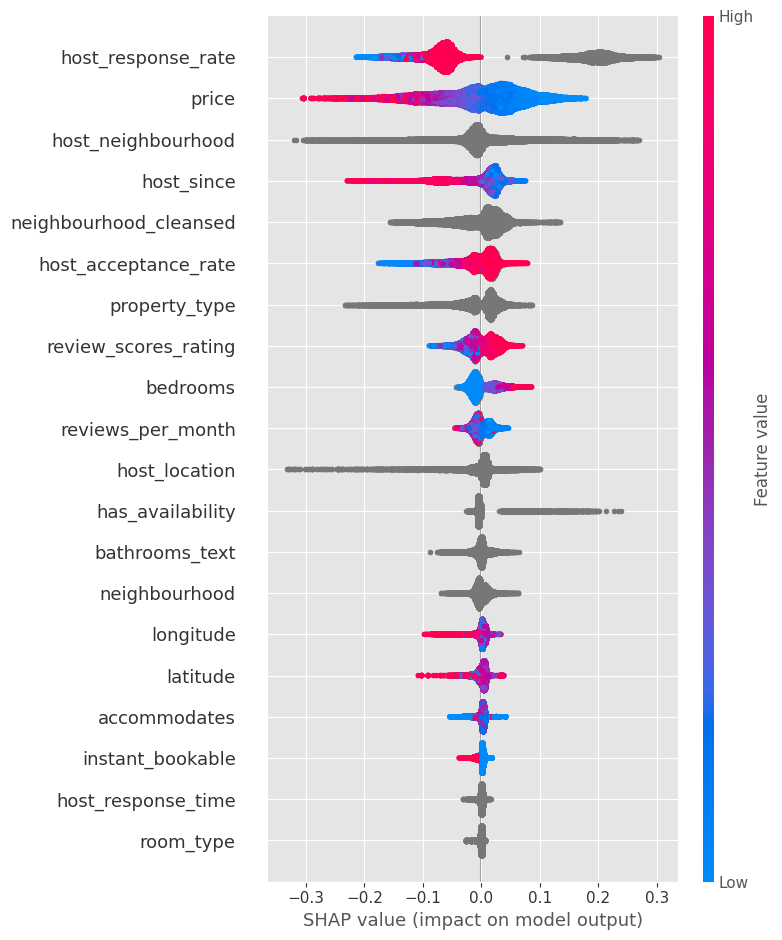

In [67]:
import lightgbm as lgb
import pandas as pd
import shap
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

# Data preprocessing
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].map({'t': 1, 'f': 0})
df_listings['instant_bookable'] = df_listings['instant_bookable'].map({'t': 1, 'f': 0})
df_listings['host_since'] = df_listings['host_since'].fillna('-1').apply(lambda x: int(x[:4] + x[5:7]))
df_listings['price'] = df_listings['price'].str.replace('[$,]', '').astype(float)


# Convert rate columns from string to numeric
cols = df_listings.columns[df_listings.columns.str.contains('rate')]
for col in cols:
  df_listings[col] = df_listings[col].str.replace('%','').astype('float')

cat_cols = df_listings.select_dtypes(exclude='number').columns.tolist()
for col in cat_cols:
  df_listings[col] = df_listings[col].astype('category')


# x and y
target_col = 'booking_ratio'
features = ['neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms',
            'beds', 'host_is_superhost', 'instant_bookable', 'property_type',
             'has_availability','host_since', 'host_neighbourhood', 'longitude', 'latitude', 'reviews_per_month',
             'host_response_rate', 'host_acceptance_rate',
            'neighbourhood', 'host_response_time', 'host_location',
            'review_scores_rating', 'price']


# features = df_listings.drop(target_col,axis=1).columns.tolist()
x = df_listings[features].copy()
y = df_listings[target_col]


# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)
lgbm_model = lgb.LGBMRegressor(subsample=0.8, colsample_bytree=0.8, random_state=2023)


# Hyperparam tuning
if use_hyperparam_optimization:
  param_grid = {
      'max_depth': [i for i in range(3,16)],
      'n_estimators': [50, 100, 200, 400],
      'reg_alpha': [0, 0.1, 0.5, 1],
  }
  search = RandomizedSearchCV(lgbm_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=30, random_state=2023, verbose=5, n_jobs=-1)
  search.fit(x_train, y_train)
  lgbm_model = search.best_estimator_


# Last fit with early stopping
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2023)
early_stopping_cb = lgb.early_stopping(stopping_rounds=50, first_metric_only=False, verbose=True)
lgbm_model.fit(
    x_train,
    y_train,
    eval_set=[(x_val, y_val)],
    callbacks=[early_stopping_cb]
)



# Evaluate the model
dummy_model = DummyRegressor()
dummy_model.fit(x_train, y_train)
y_pred_dummy= dummy_model.predict(x_test)
y_pred = lgbm_model.predict(x_test)


print('\n\n')
print('LGBM R2:', round(r2_score(y_test, y_pred), 6))
print('Dummy R2:', round(r2_score(y_test, y_pred_dummy), 6))


# SHAP Analysis
explainer = shap.Explainer(lgbm_model)
shap_values = explainer.shap_values(x_train)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])
shap.summary_plot(shap_values, x_train)

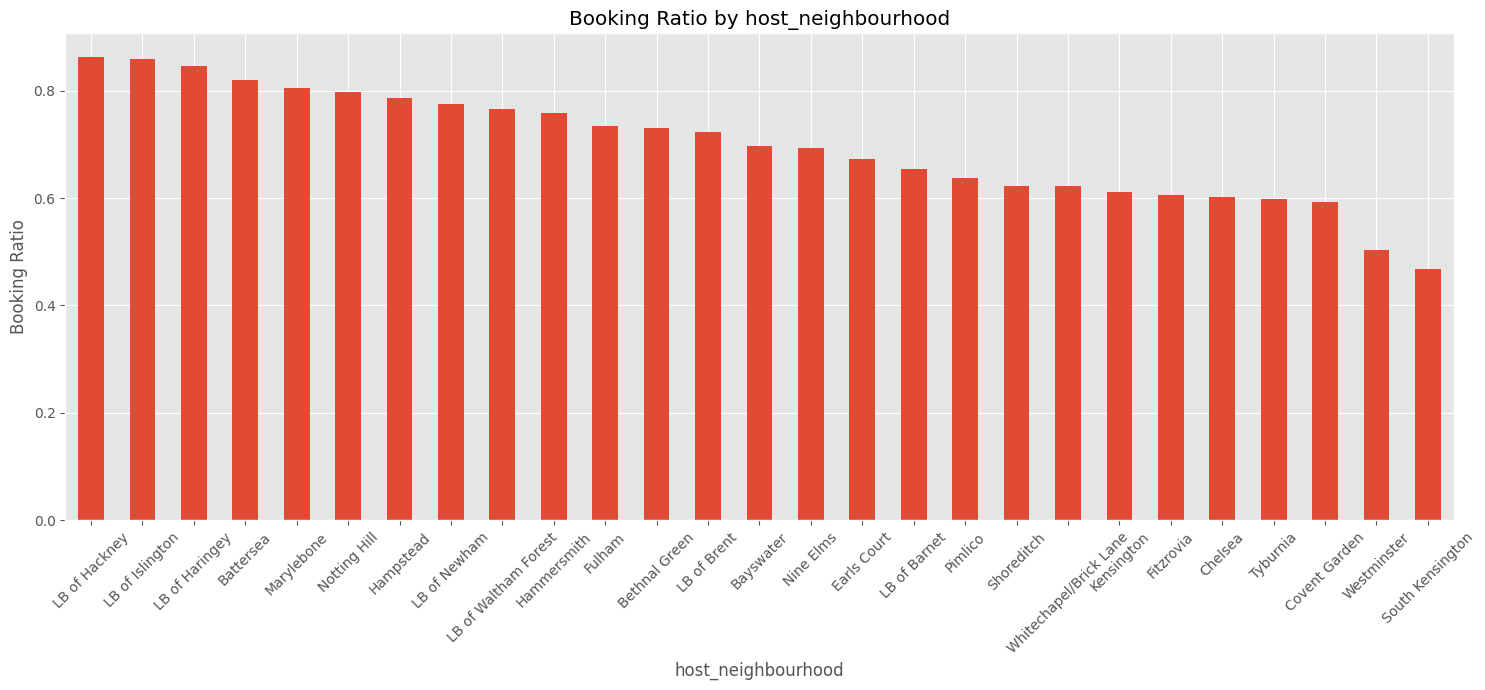

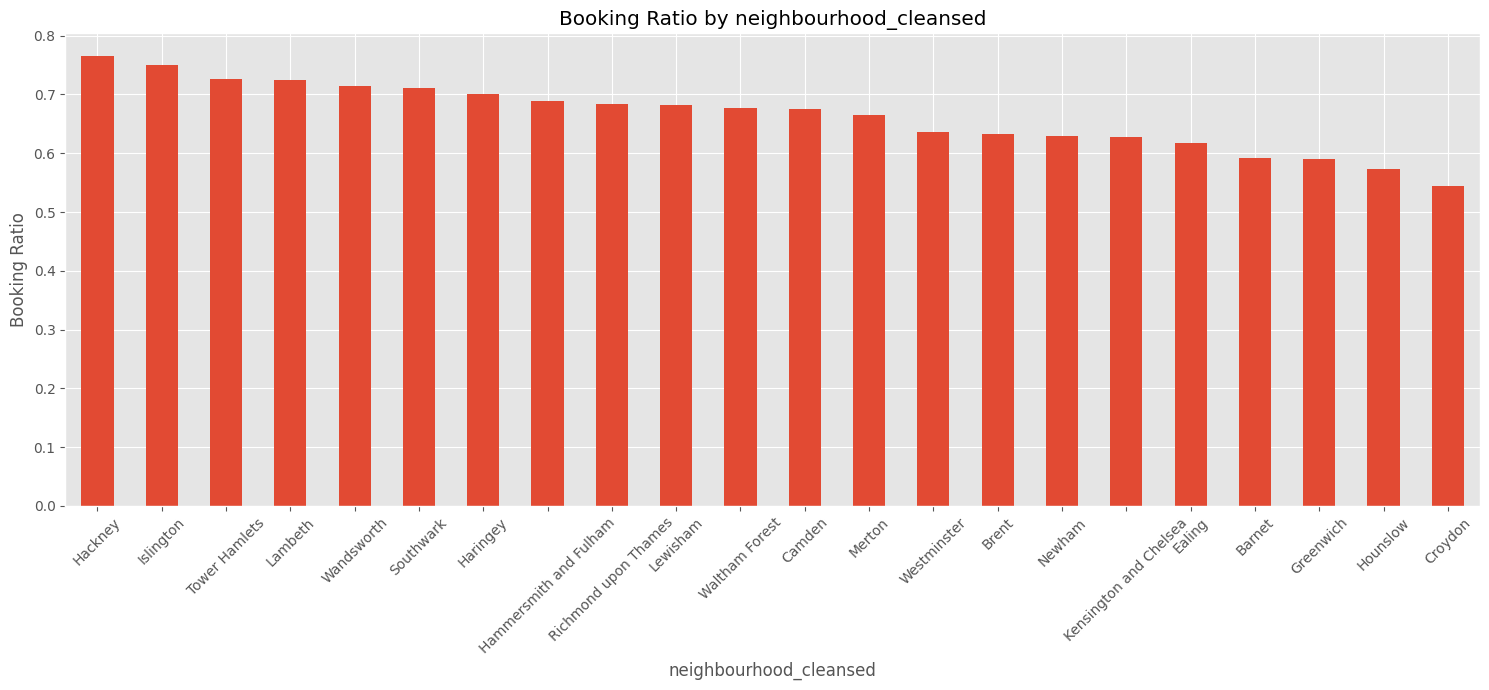

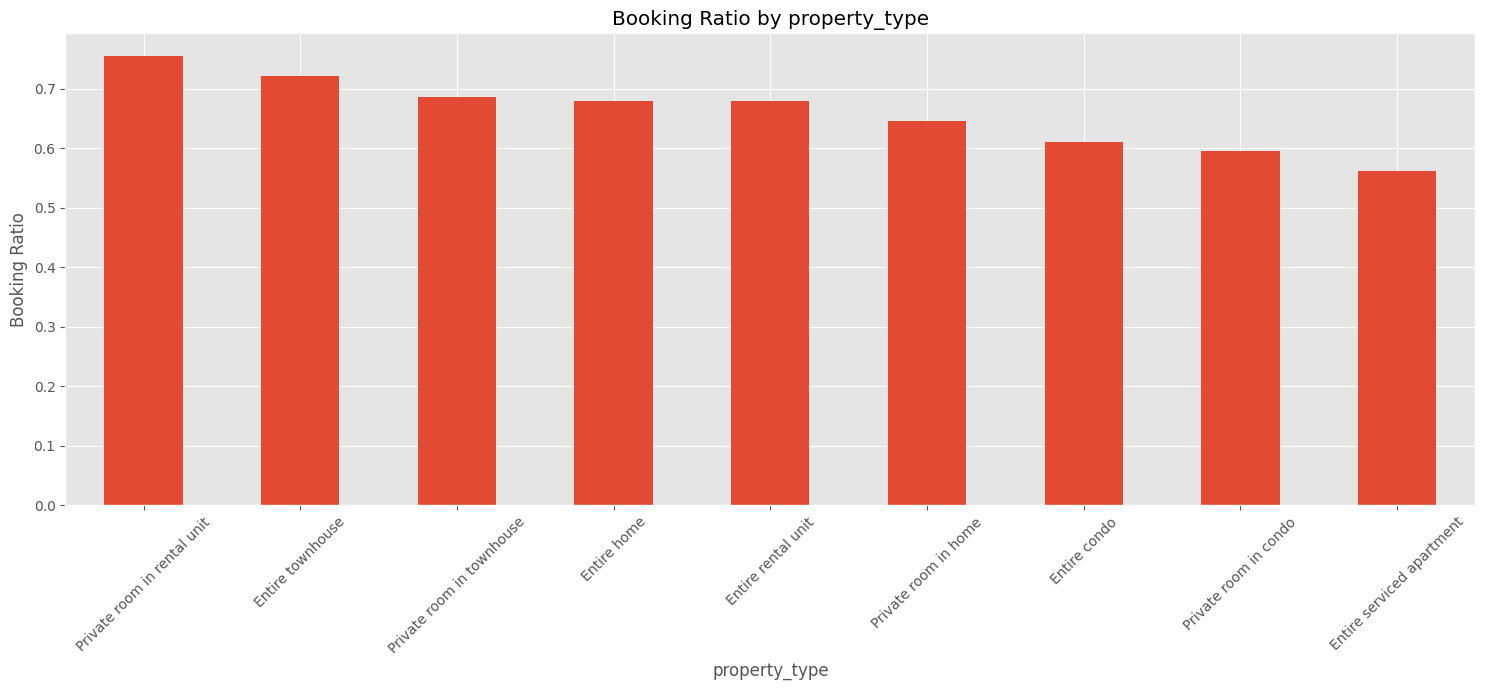

In [68]:
def draw_categorical_analysis(col):
  # Group by categories which are present more than 0.01 and calculate the average price
  df_agg_by_cat = df_listings.groupby(col).agg(
                      target_mean=(target_col, 'mean'),
                      count=(target_col,'count')
                      ).sort_values('target_mean',ascending=False)
  df_agg_by_cat = df_agg_by_cat[df_agg_by_cat['count'] >= 0.01 * df_agg_by_cat['count'].sum()].head(30)['target_mean']

  # Plotting average price by categories
  df_agg_by_cat.plot(kind='bar', figsize=(15, 7))
  plt.title(f'Booking Ratio by {col}')
  plt.ylabel('Booking Ratio')
  plt.xlabel(f'{col}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


cat_cols = ['host_neighbourhood', 'neighbourhood_cleansed', 'property_type']
for col in cat_cols:
  draw_categorical_analysis(col)
  print('\n\n')

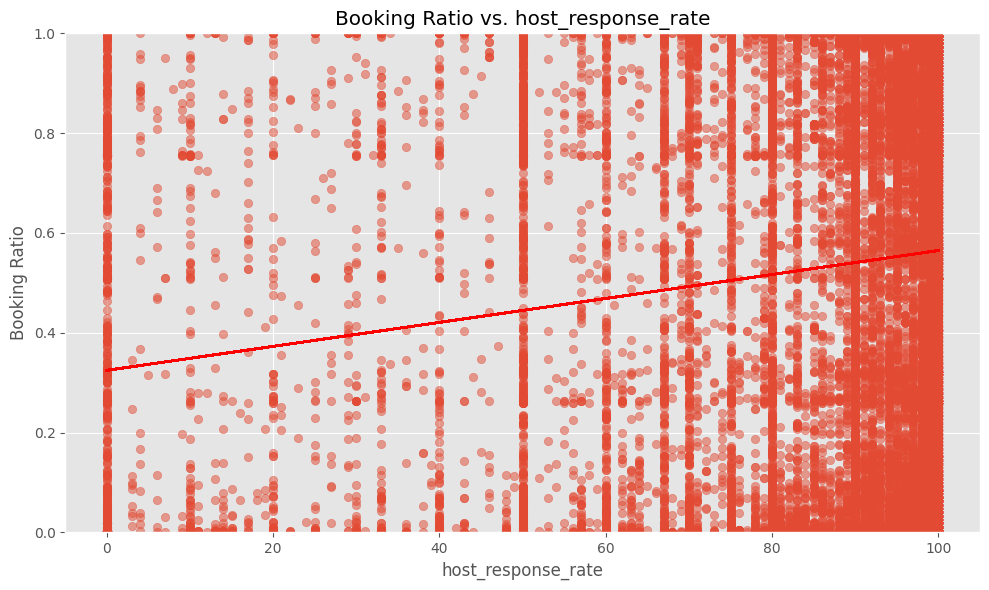

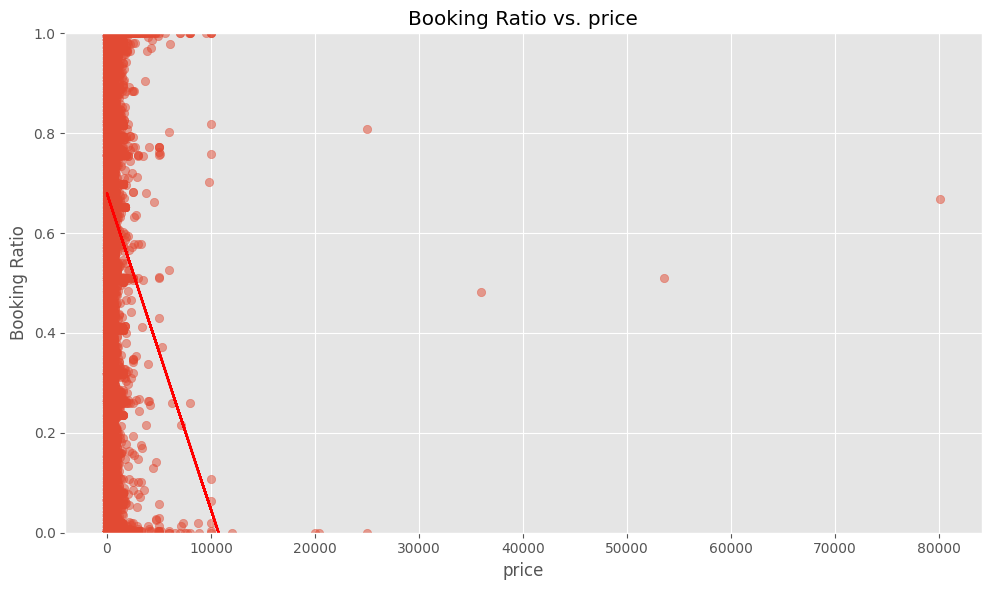

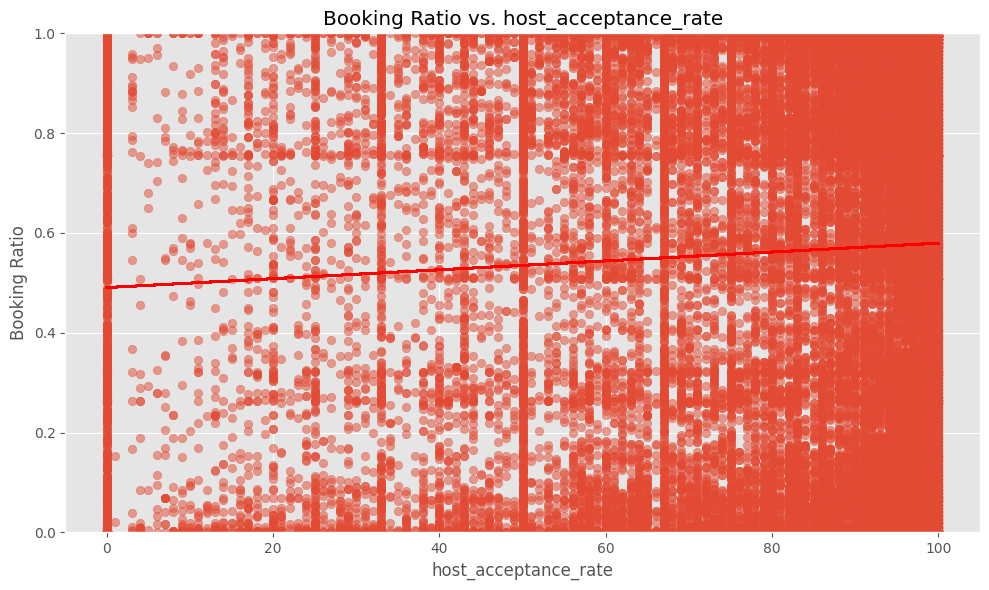

In [72]:
import numpy as np
import matplotlib.pyplot as plt


def draw_numerical_analysis(col):
    plt.figure(figsize=(10, 6))

    # Scatter plot
    plt.scatter(df_listings[col], df_listings[target_col], alpha=0.5)

    # Regression line with non-null values
    df_temp = df_listings.dropna(subset=[col, target_col])
    m, b = np.polyfit(df_temp[col], df_temp[target_col], 1)  # Linear fit
    plt.plot(df_listings[col], m*df_listings[col] + b, color='red')  # Plotting the regression line

    plt.title(f'Booking Ratio vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Booking Ratio')
    plt.tight_layout()
    plt.ylim(0,1)
    plt.show()



numerical_features = ['host_response_rate', 'price', 'host_acceptance_rate']
for col in numerical_features:
  draw_numerical_analysis(col)

# 2) Is there any seasonality in demand?

---



Seasonality in Airbnb Demand:

Our analysis reveals a clear seasonality in the demand for Airbnb listings. There's a notable peak in demand at the start of September, which then experiences a decline as we move into the colder winter months. However, there's an exception to this trend: demand sees a brief resurgence during the Christmas season. As the chill of winter wanes and we transition into spring, there's a gradual uptick in demand that continues through the summer months. This pattern underscores the influence of seasonal changes and holidays on booking preferences and travel behaviors.

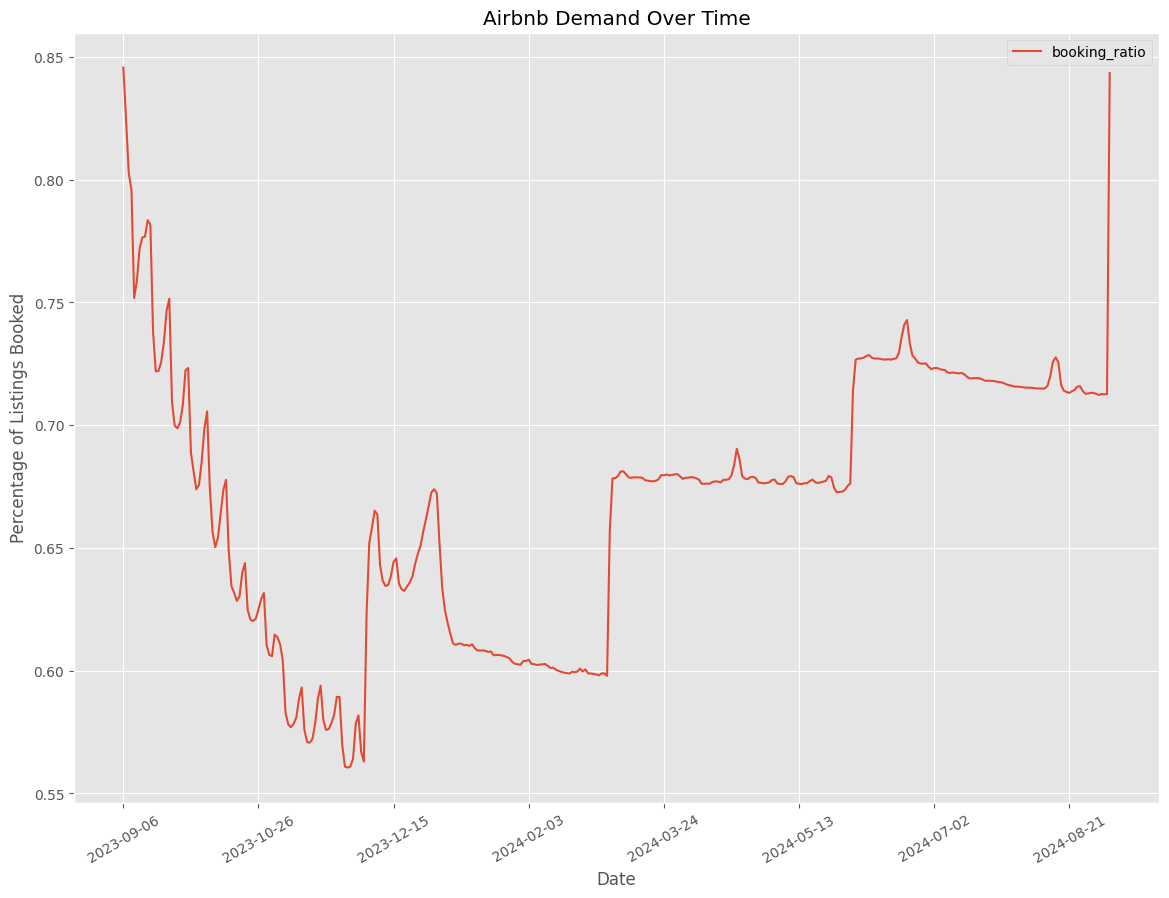

In [73]:
demand_agg = df_calendar.groupby('date').agg(
                    booking_ratio=('booked', 'mean')
                )

# Plotting the demand over time
demand_agg.plot(figsize=(14, 10))
plt.title('Airbnb Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Listings Booked')
plt.xticks(rotation=30)
plt.show()

# 3) Pricing Strategy

Pricing Strategy Insights:

When it comes to determining the pricing of Airbnb listings, our analysis reveals that location stands out as the most crucial factor. The number of bedrooms and the capacity of the listing (how many it can accommodate) also have a direct impact on price; as these numbers rise, so does the listing's price. Similarly, the presence of private bathrooms plays a significant role in pricing, with a correlation suggesting that larger homes, often equipped with more private bathrooms, command higher prices. Furthermore, entire houses are consistently priced higher compared to private rentals, emphasizing the premium placed on space and privacy by guests.

Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
The default value of regex will change from True to False in a future version.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2672
[LightGBM] [Info] Number of data points in the train set: 56284, number of used features: 25
[LightGBM] [Info] Start training from score 180.199062
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[38]	valid_0's l2: 714941



LGBM R2: 0.349442
Dummy R2: -2e-05


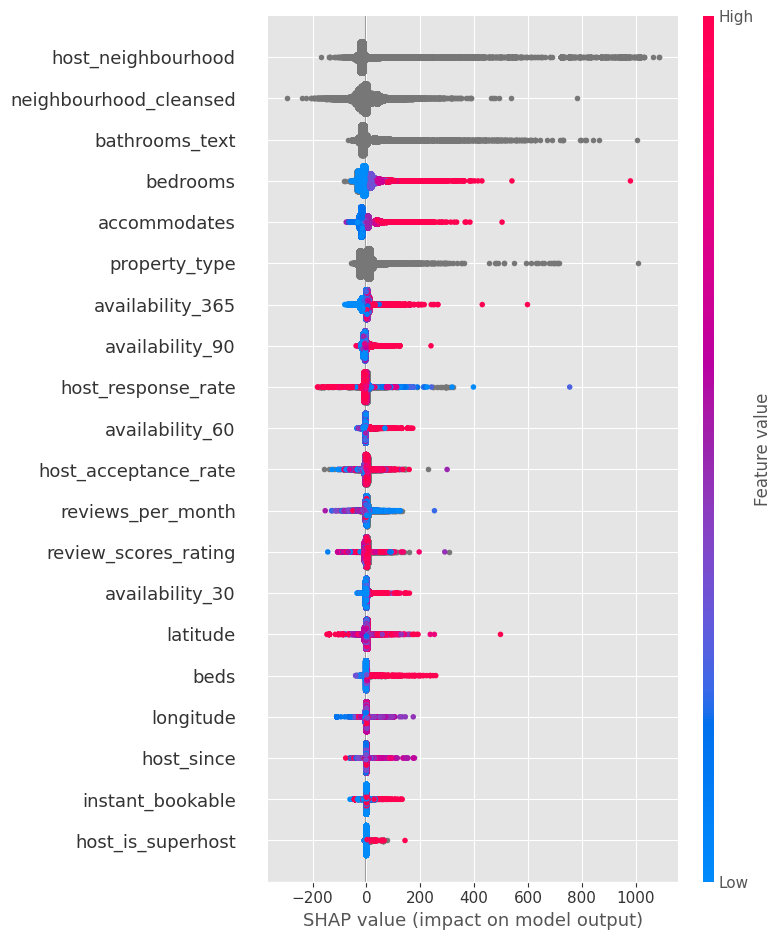

In [18]:
import lightgbm as lgb
import pandas as pd
import shap
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

df_listings = pd.read_csv(input_path + 'listings.csv')

# Data preprocessing
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].map({'t': 1, 'f': 0})
df_listings['instant_bookable'] = df_listings['instant_bookable'].map({'t': 1, 'f': 0})
df_listings['host_since'] = df_listings['host_since'].fillna('-1').apply(lambda x: int(x[:4] + x[5:7]))
df_listings['price'] = df_listings['price'].str.replace('[$,]', '').astype(float)


# Convert rate columns from string to numeric
cols = df_listings.columns[df_listings.columns.str.contains('rate')]
for col in cols:
  df_listings[col] = df_listings[col].str.replace('%','').astype('float')

cat_cols = df_listings.select_dtypes(exclude='number').columns.tolist()
for col in cat_cols:
  df_listings[col] = df_listings[col].astype('category')


# x and y
target_col = 'price'
features = ['neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms',
            'beds', 'host_is_superhost', 'instant_bookable', 'property_type',
             'has_availability','host_since', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'host_neighbourhood', 'longitude', 'latitude', 'reviews_per_month',
             'host_response_rate', 'host_acceptance_rate',
            'neighbourhood', 'host_response_time', 'host_location',
            'review_scores_rating']


# features = df_listings.drop(target_col,axis=1).columns.tolist()
x = df_listings[features].copy()
y = df_listings[target_col]


# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)
lgbm_model = lgb.LGBMRegressor(subsample=0.8, colsample_bytree=0.8, random_state=2023)


# Hyperparam tuning
if use_hyperparam_optimization:
  param_grid = {
      'max_depth': [i for i in range(3,16)],
      'n_estimators': [50, 100, 200, 400],
      'reg_alpha': [0, 0.1, 0.5, 1],
  }
  search = RandomizedSearchCV(lgbm_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=30, random_state=2023, verbose=5, n_jobs=-1)
  search.fit(x_train, y_train)
  lgbm_model = search.best_estimator_


# Last fit with early stopping
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2023)
early_stopping_cb = lgb.early_stopping(stopping_rounds=50, first_metric_only=False, verbose=True)
lgbm_model.fit(
    x_train,
    y_train,
    eval_set=[(x_val, y_val)],
    callbacks=[early_stopping_cb]
)



# Evaluate the model
dummy_model = DummyRegressor()
dummy_model.fit(x_train, y_train)
y_pred_dummy= dummy_model.predict(x_test)
y_pred = lgbm_model.predict(x_test)


print('\n\n')
print('LGBM R2:', round(r2_score(y_test, y_pred), 6))
print('Dummy R2:', round(r2_score(y_test, y_pred_dummy), 6))


# SHAP Analysis
explainer = shap.Explainer(lgbm_model)
shap_values = explainer.shap_values(x_train)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])
shap.summary_plot(shap_values, x_train)

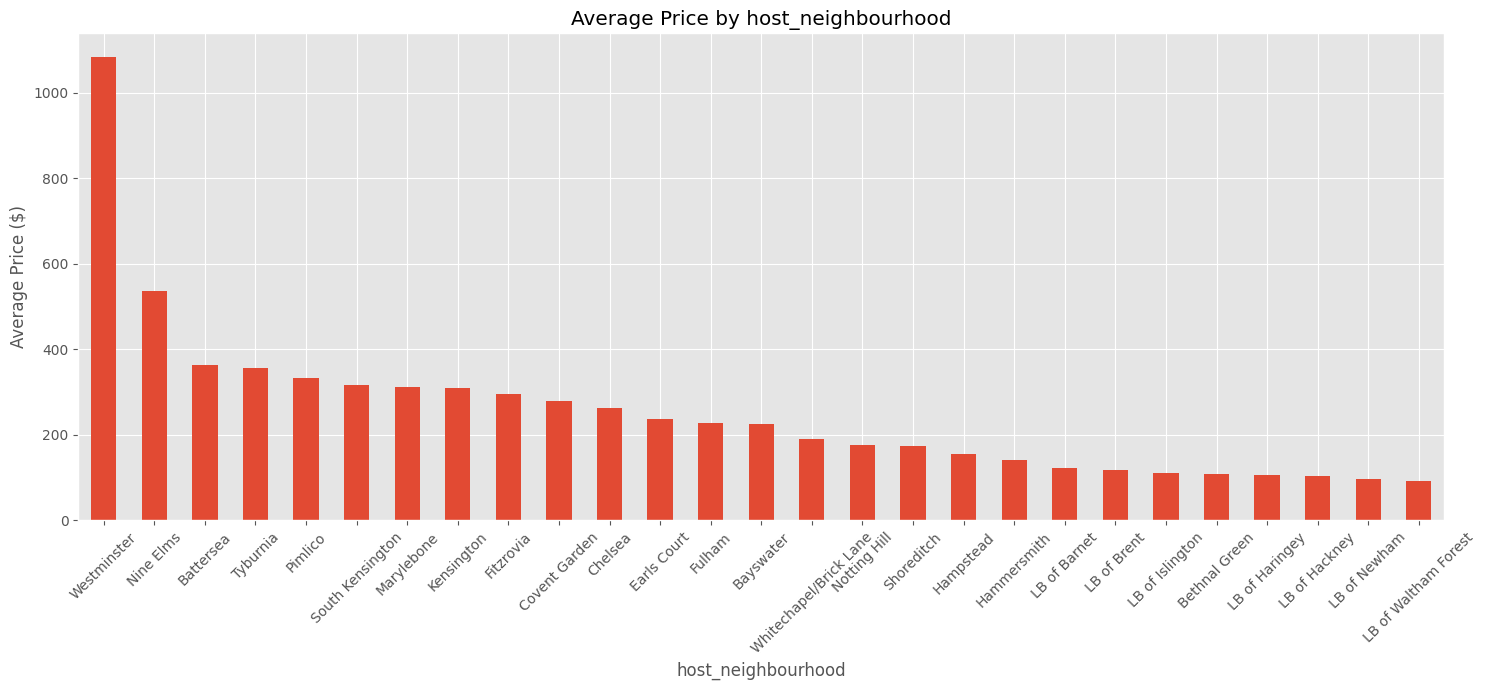

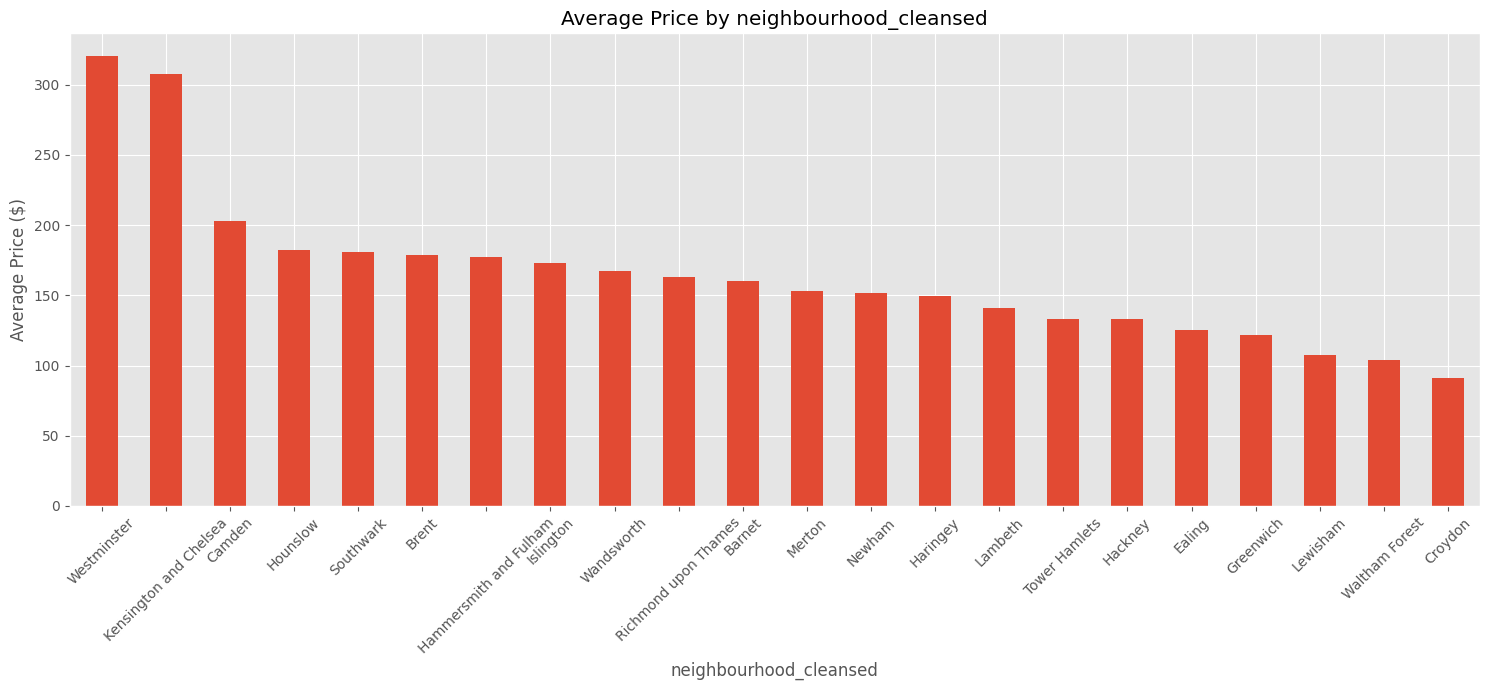

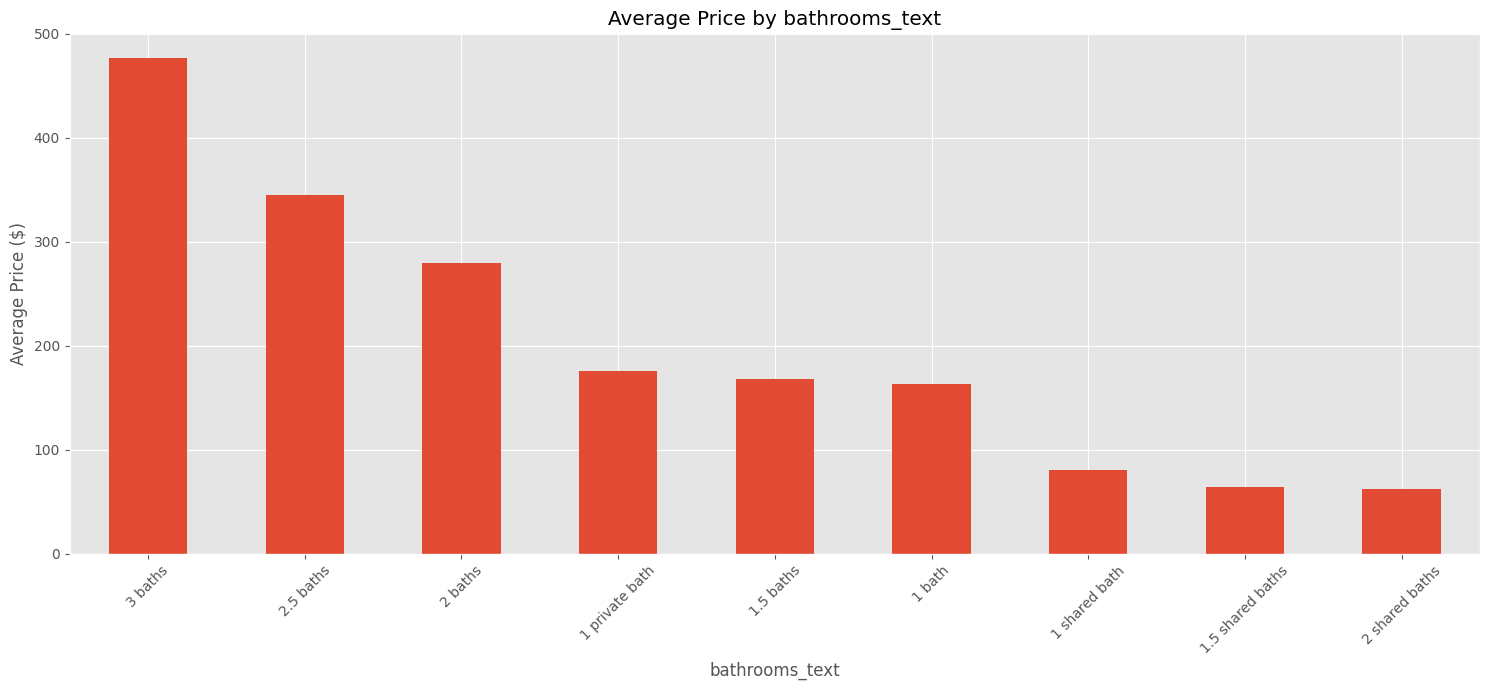

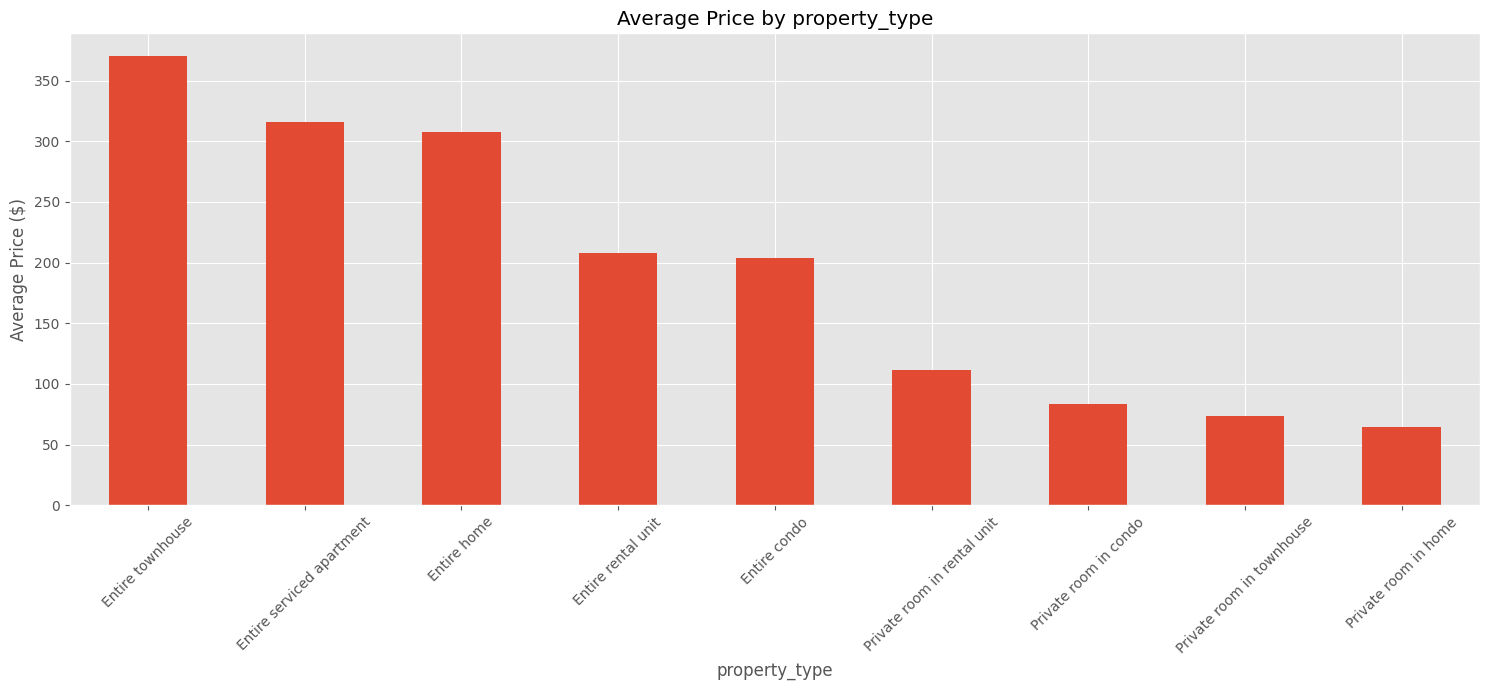

In [19]:
def draw_categorical_analysis(col):
  # Group by categories which are present more than 0.01 and calculate the average price
  df_agg_by_cat = df_listings.groupby(col).agg(
                      target_mean=(target_col, 'mean'),
                      count=(target_col,'count')
                      ).sort_values('target_mean',ascending=False)
  df_agg_by_cat = df_agg_by_cat[df_agg_by_cat['count'] >= 0.01 * df_agg_by_cat['count'].sum()].head(30)['target_mean']

  # Plotting average price by categories
  df_agg_by_cat.plot(kind='bar', figsize=(15, 7))
  plt.title(f'Average Price by {col}')
  plt.ylabel('Average Price ($)')
  plt.xlabel(f'{col}')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()


cat_cols = ['host_neighbourhood', 'neighbourhood_cleansed', 'bathrooms_text','property_type']
for col in cat_cols:
  draw_categorical_analysis(col)
  print('\n\n')

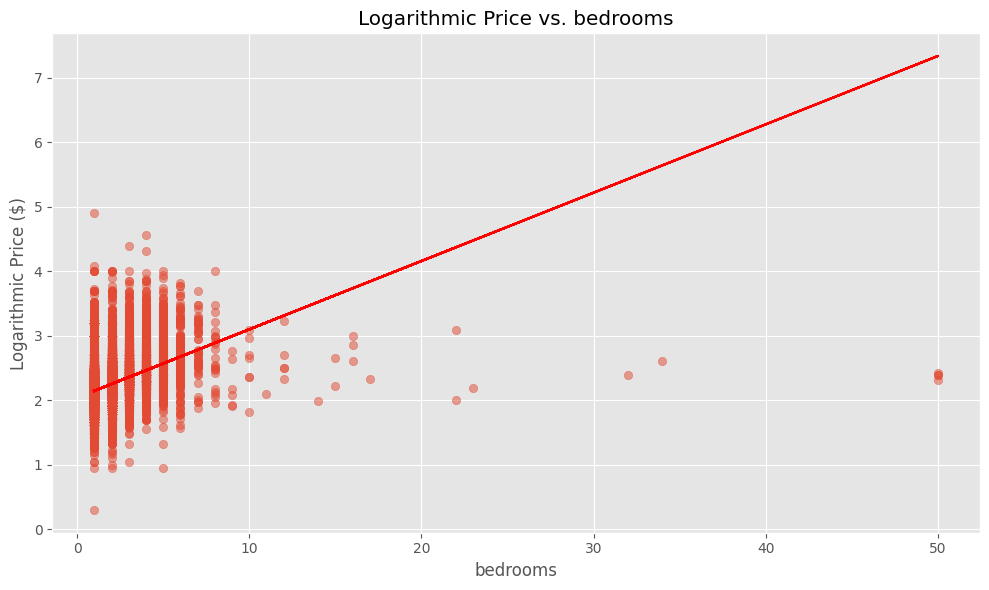

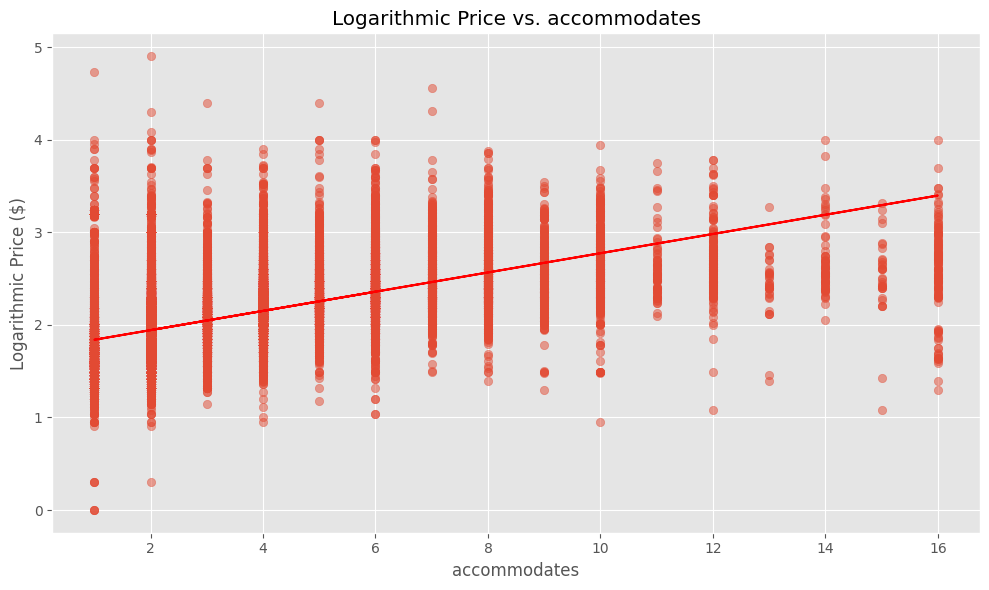

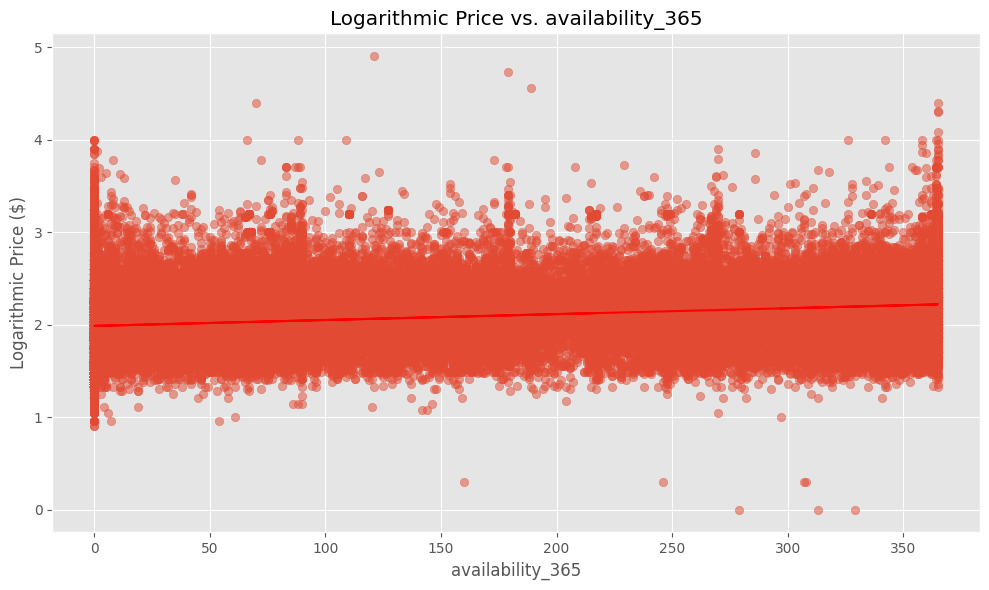

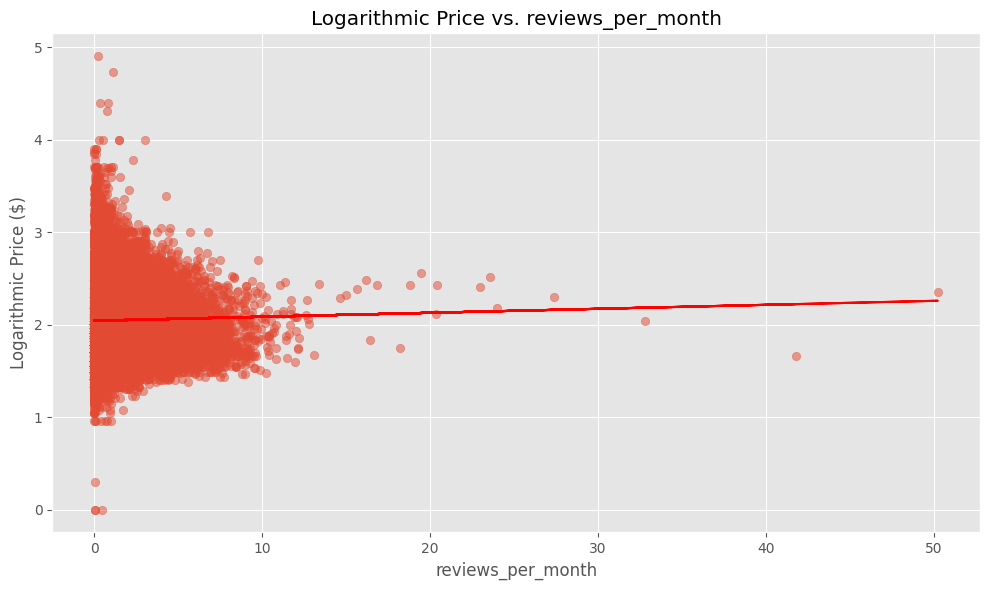

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def draw_numerical_analysis(col):
    plt.figure(figsize=(10, 6))

    # Scatter plot
    plt.scatter(df_listings[col], df_listings['log_price'], alpha=0.5)

    # Regression line with non-null values
    df_temp = df_listings.dropna(subset=[col, 'log_price'])
    m, b = np.polyfit(df_temp[col], df_temp['log_price'], 1)  # Linear fit
    plt.plot(df_listings[col], m*df_listings[col] + b, color='red')  # Plotting the regression line

    plt.title(f'Logarithmic Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Logarithmic Price ($)')
    plt.tight_layout()
    plt.show()



df_listings['log_price'] = np.log10(df_listings['price'] + 1)
numerical_features = ['bedrooms', 'accommodates', 'availability_365','reviews_per_month']
for col in numerical_features:
  draw_numerical_analysis(col)

# 4)Review Ratings Analysis

Review Ratings Insights:

Our deep dive into review ratings has underscored the paramount role that host-related factors play in determining guest feedback. For instance, listings managed by 'Superhosts'—a designation by Airbnb for top-rated and highly experienced hosts—consistently receive more positive reviews than those managed by other hosts. Another influential metric is the host response rate; an increased rate correlates with better review ratings, emphasizing the importance guests place on timely and effective communication. Interestingly, the feature of instant bookability appears to have an adverse effect on review ratings, a trend that warrants further investigation to discern its underlying reasons. When it comes to property attributes, while both bathrooms and bedrooms influence reviews, it's evident that guests place a heightened emphasis on bathrooms. This suggests that factors related to hygiene, as well as the value of private bathrooms, are of significant importance to Airbnb users.

Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
The default value of regex will change from True to False in a future version.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2633
[LightGBM] [Info] Number of data points in the train set: 42104, number of used features: 25
[LightGBM] [Info] Start training from score 4.597122
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[54]	valid_0's l2: 0.448466



LGBM R2: 0.191318
Dummy R2: -8.6e-05


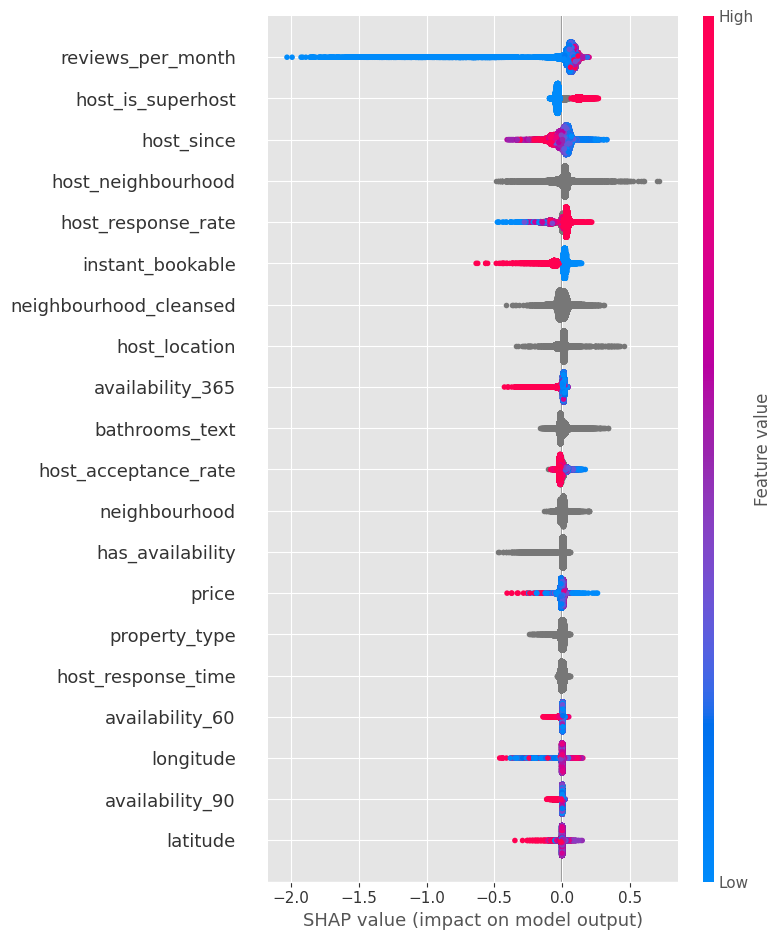

In [21]:
import lightgbm as lgb
import pandas as pd
import shap
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

df_listings = pd.read_csv(input_path + 'listings.csv')

# Data preprocessing
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].map({'t': 1, 'f': 0})
df_listings['instant_bookable'] = df_listings['instant_bookable'].map({'t': 1, 'f': 0})
df_listings['host_since'] = df_listings['host_since'].fillna('-1').apply(lambda x: int(x[:4] + x[5:7]))
df_listings['price'] = df_listings['price'].str.replace('[$,]', '').astype(float)

# Convert rate columns from string to numeric
cols = df_listings.columns[df_listings.columns.str.contains('rate')]
for col in cols:
  df_listings[col] = df_listings[col].str.replace('%','').astype('float')

cat_cols = df_listings.select_dtypes(exclude='number').columns.tolist()
for col in cat_cols:
  df_listings[col] = df_listings[col].astype('category')


# x and y
target_col = 'review_scores_rating'
features = ['neighbourhood_cleansed', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms',
            'beds', 'host_is_superhost', 'instant_bookable', 'property_type',
             'has_availability','host_since', 'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'host_neighbourhood', 'longitude', 'latitude', 'reviews_per_month',
             'host_response_rate', 'host_acceptance_rate',
            'neighbourhood', 'host_response_time', 'host_location',
            'price']

# Prevent data leakage
review_cols = df_listings.columns[df_listings.columns.str.contains('review_score')].tolist()
features = [col for col in features if col not in review_cols]

df_listings = df_listings[df_listings[target_col].notna()]
x = df_listings[features].copy()
y = df_listings[target_col]


# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)
lgbm_model = lgb.LGBMRegressor(subsample=0.8, colsample_bytree=0.8, random_state=2023)


# Hyperparam tuning
if use_hyperparam_optimization:
  param_grid = {
      'max_depth': [i for i in range(3,16)],
      'n_estimators': [50, 100, 200, 400],
      'reg_alpha': [0, 0.1, 0.5, 1],
  }
  search = RandomizedSearchCV(lgbm_model, param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=30, random_state=2023, verbose=5, n_jobs=-1)
  search.fit(x_train, y_train)
  lgbm_model = search.best_estimator_


# Last fit with early stopping
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2023)
early_stopping_cb = lgb.early_stopping(stopping_rounds=50, first_metric_only=False, verbose=True)
lgbm_model.fit(
    x_train,
    y_train,
    eval_set=[(x_val, y_val)],
    callbacks=[early_stopping_cb]
)



# Evaluate the model
dummy_model = DummyRegressor()
dummy_model.fit(x_train, y_train)
y_pred_dummy= dummy_model.predict(x_test)
y_pred = lgbm_model.predict(x_test)


print('\n\n')
print('LGBM R2:', round(r2_score(y_test, y_pred), 6))
print('Dummy R2:', round(r2_score(y_test, y_pred_dummy), 6))


# SHAP Analysis
explainer = shap.Explainer(lgbm_model)
shap_values = explainer.shap_values(x_train)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])
shap.summary_plot(shap_values, x_train)

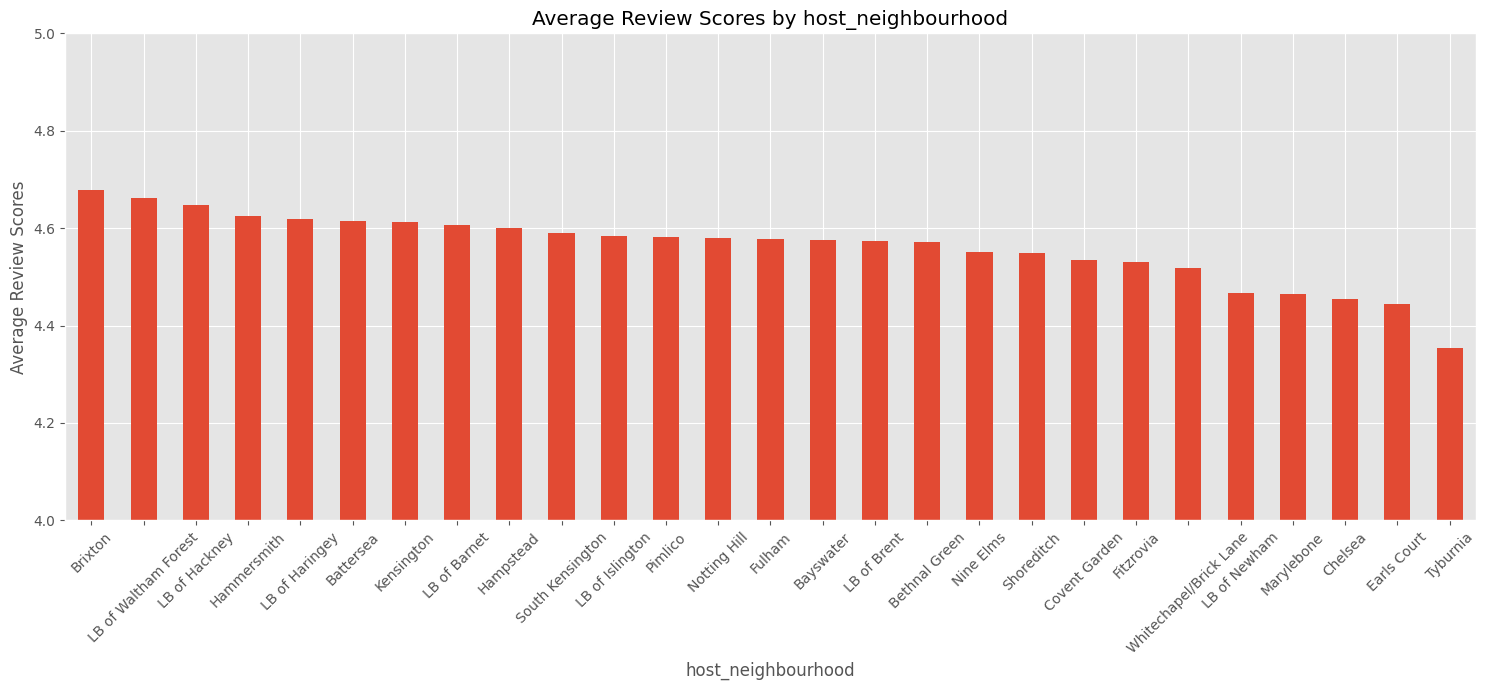

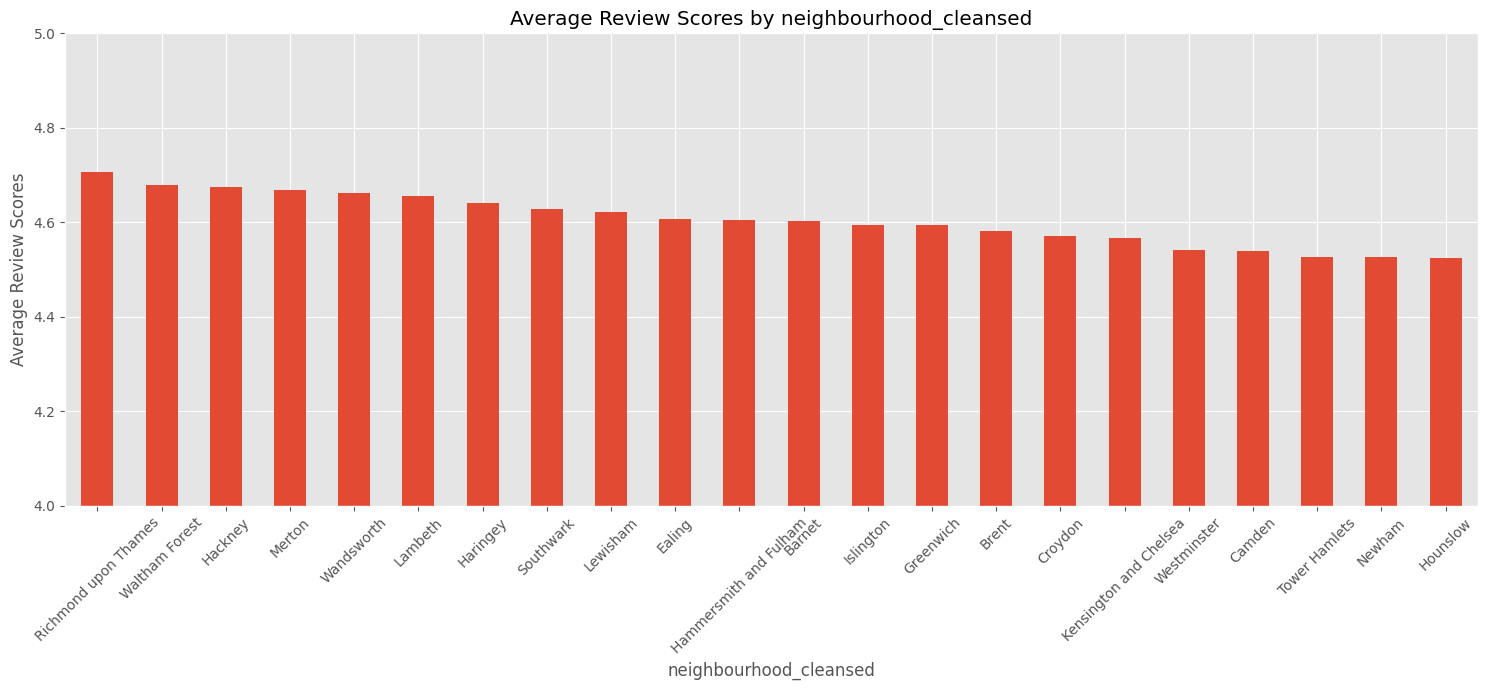

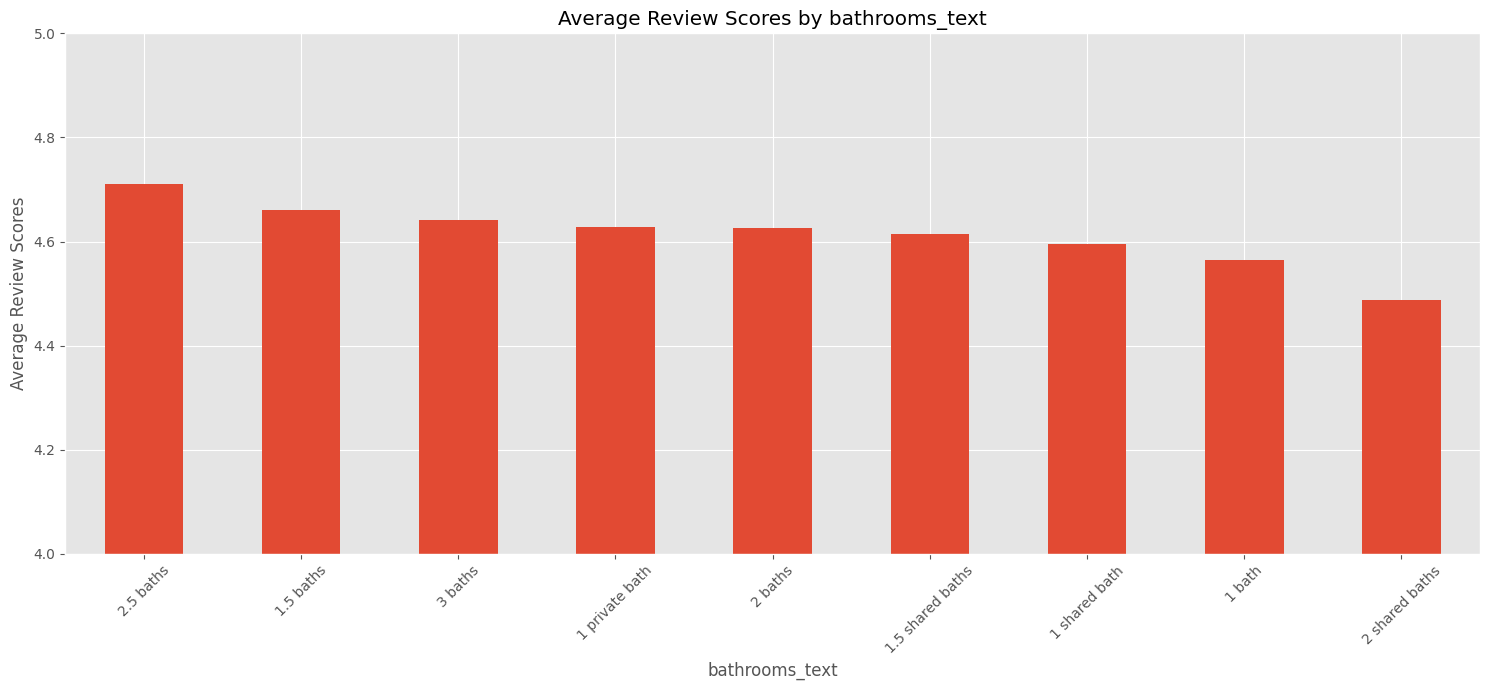

In [22]:
def draw_categorical_analysis(col):

  # Group by categories which are present more than 0.01 and calculate the average price
  df_agg_by_cat = df_listings.groupby(col).agg(
                      target_mean=(target_col, 'mean'),
                      count=(target_col,'count')
                      ).sort_values('target_mean',ascending=False)
  df_agg_by_cat = df_agg_by_cat[df_agg_by_cat['count'] >= 0.01 * df_agg_by_cat['count'].sum()].head(30)['target_mean']

  # Plotting average price by categories
  df_agg_by_cat.plot(kind='bar', figsize=(15, 7))
  plt.title(f'Average Review Scores by {col}')
  plt.ylabel('Average Review Scores')
  plt.xlabel(f'{col}')
  plt.xticks(rotation=45)

  plt.ylim(4, 5)
  plt.tight_layout()
  plt.show()


cat_cols = ['host_neighbourhood', 'neighbourhood_cleansed','bathrooms_text',]
for col in cat_cols:
  draw_categorical_analysis(col)
  print('\n\n')

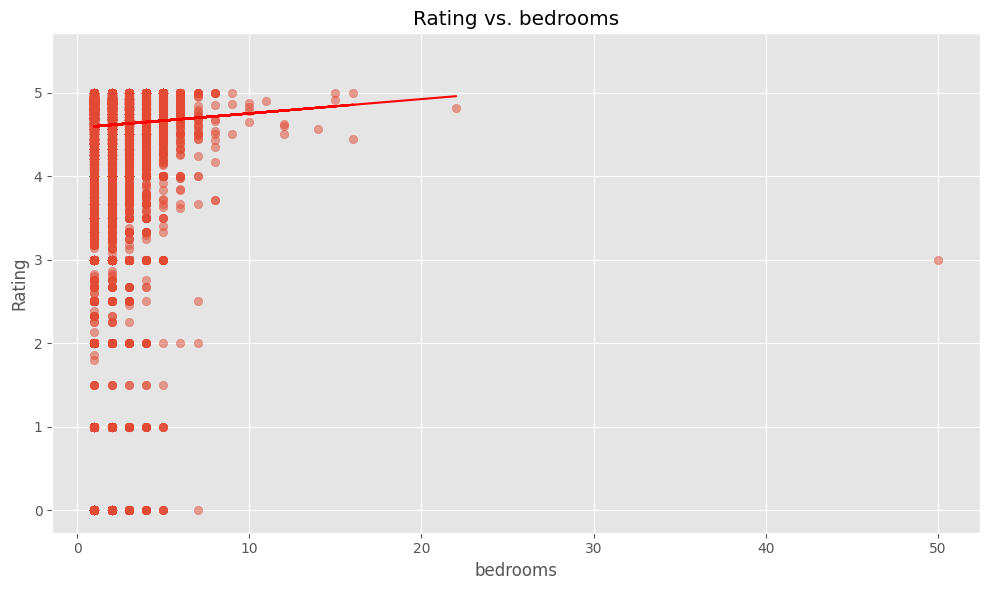

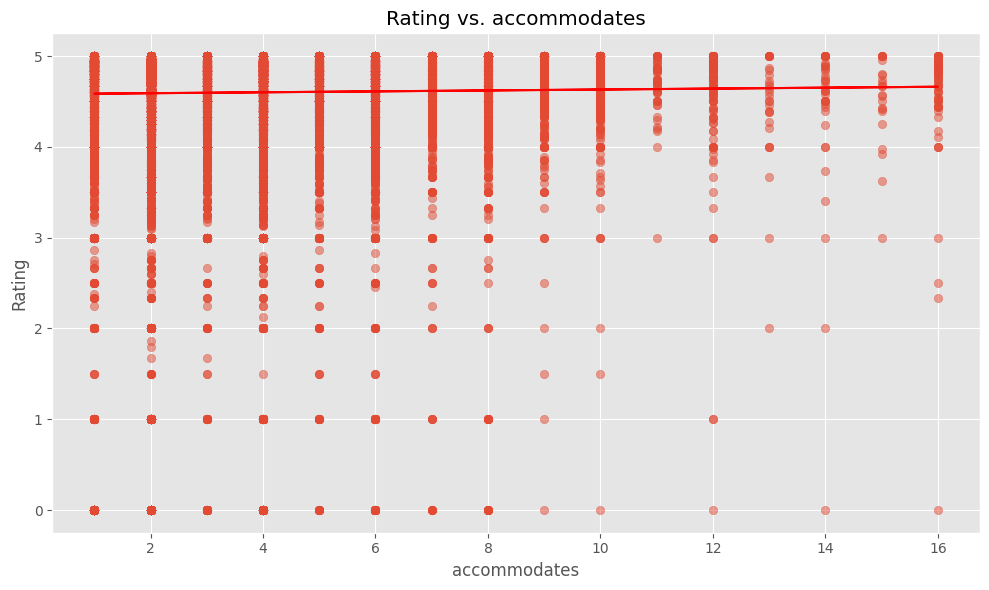

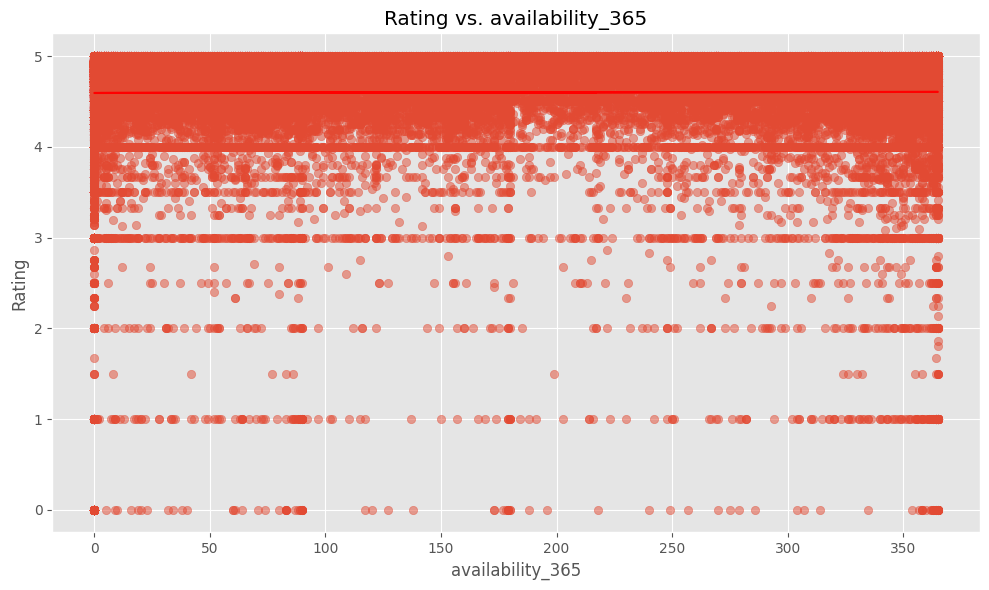

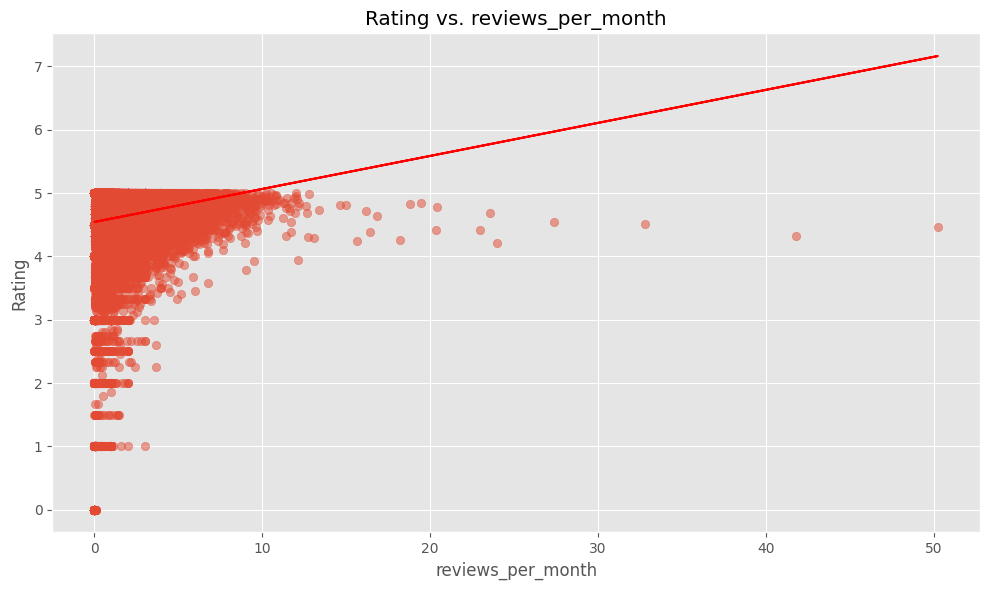

In [23]:
import numpy as np
import matplotlib.pyplot as plt


def draw_numerical_analysis(col):
    plt.figure(figsize=(10, 6))

    # Scatter plot
    plt.scatter(df_listings[col], df_listings[target_col], alpha=0.5)

    # Regression line with non-null values
    df_temp = df_listings.dropna(subset=[col, target_col])
    m, b = np.polyfit(df_temp[col], df_temp[target_col], 1)  # Linear fit
    plt.plot(df_listings[col], m*df_listings[col] + b, color='red')  # Plotting the regression line

    plt.title(f'Rating vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()



numerical_features = ['bedrooms', 'accommodates', 'availability_365','reviews_per_month']
for col in numerical_features:
  draw_numerical_analysis(col)

# 5) What are the languages of the reviews?


To determine the languages predominantly used in reviews, we employed Facebook's FastText library for language detection. Due to computational constraints, our analysis was limited to a random subsample of 10,000 reviews. Our findings confirmed that English is the preeminent language for reviews, a trend that aligns with global lingual preferences. Following English, the most common languages were French, Spanish, German, and Italian, in that order. This pattern indicates that a significant portion of Airbnb's foreign guests hail from European countries. A valuable insight for hosts derived from this data is the potential advantage of familiarizing themselves with greeting phrases in these languages, as such gestures can notably enhance the guest experience and satisfaction.

In [24]:
# Download the lang detection model
import fasttext
import requests
import os

# Define the paths and URLs
lang_detection_model_path = "./models/lid218e.bin"
model_url = 'https://dl.fbaipublicfiles.com/nllb/lid/lid218e.bin'

# Check if the model file already exists
if not os.path.exists(lang_detection_model_path):
    try:
        response = requests.get(model_url, stream=True)
        response.raise_for_status()  # Raise an exception for HTTP errors

        os.makedirs(os.path.dirname(lang_detection_model_path), exist_ok=True)

        with open(lang_detection_model_path, "wb") as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)

        print('Language detection model downloaded successfully.')
    except Exception as e:
        print(f'Error downloading the model: {e}')

# Load the model
if os.path.exists(lang_detection_model_path):
    lang_detection_model = fasttext.load_model(lang_detection_model_path)
else:
    print('Model file not found.')

Language detection model downloaded successfully.


In [25]:
%%time
# Get lang label prediction for a subsample of the data and then filter for confidence > 90%
df_reviews_small = df_reviews.sample(10000, random_state=2023).reset_index(drop=True)
lang_detection_model = fasttext.load_model(lang_detection_model_path)
lang_id_output = lang_detection_model.predict(df_reviews_small['comments'].fillna('').tolist())

lang_id_output = pd.DataFrame(lang_id_output, index=['lang_label', 'confidence']).T
lang_id_output['lang_label'] = lang_id_output['lang_label'].apply(lambda x: x[0].replace('__label__',''))
mask = lang_id_output['confidence'].apply(lambda x: x[0] > 0.90)
lang_id_output = lang_id_output[mask]

df_reviews_small = df_reviews_small.join(lang_id_output, how='inner')
del lang_id_output
df_reviews_small

CPU times: user 3.97 s, sys: 1.19 s, total: 5.16 s
Wall time: 5.35 s


listing_id                  id        date  reviewer_id  \
0               53151428  932429740811183369  2023-07-10    436022457   
1               12103181           562796775  2019-11-11     48937337   
2               22875163           269977493  2018-05-28     48702137   
3               41524696  427328285348286248  2021-08-12    411133485   
4                  81410              349384  2011-07-03       570381   
...                  ...                 ...         ...          ...   
9995              647243           585849171  2020-01-01     97535081   
9996              465435           206436603  2017-10-25     77598162   
9997  673897226805045561  911437679817398460  2023-06-11    128622469   
9998             4748665  729549981624152833  2022-10-03    477699713   
9999  791750078586493359  836161221051589102  2023-02-27     37629692   

     reviewer_name                                           comments  \
0            Joyce  Nice place nice area but can be very noisy dur...   
1           Graeme  A smallish, but quiet, spotless and nicely dec...   
2         Bhavisha  We were lucky to find this air BnB right in th...   
3           Shakia                                               good   
4            Susan  The communication and caring about our trip an...   
...            ...                                                ...   
9995       Vincent  Appartement conforme à l'annonce. Idéalement p...   
9996         Pablo  Excelente anfitrión, departamento muy cómodo, ...   
9997          Xiao  Tarik is a great host and I really enjoyed my ...   
9998       Chantal  Alles wie beschrieben. Ein kleines aber feines...   
9999        Astrid  The place of Tomas is really beautiful, Tomas ...   

     lang_label    confidence  
0      eng_Latn   [0.9999728]  
1      eng_Latn   [0.9997076]  
2      eng_Latn   [0.9999939]  
3      eng_Latn  [0.99973565]  
4      eng_Latn   [0.9999672]  
...         ...           ...  
9995   fra_Latn   [0.9969249]  
9996   spa_Latn   [0.9978084]  
9997   eng_Latn   [1.0000007]  
9998   deu_Latn  [0.99972945]  
9999   eng_Latn   [0.9999813]  

[9705 rows x 8 columns]

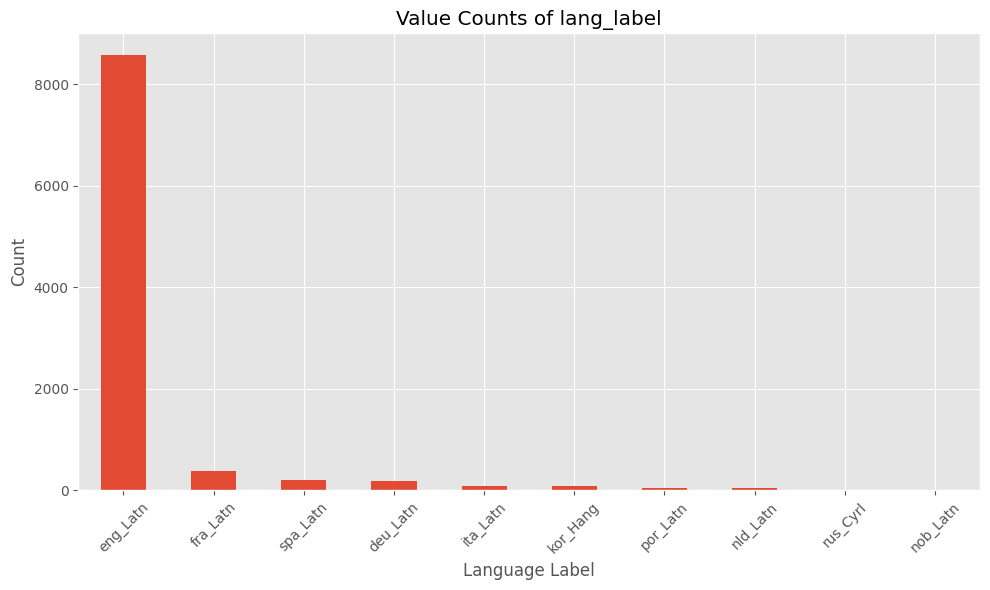

In [26]:
# Create a bar plot for language value counts
value_counts = df_reviews_small['lang_label'].value_counts().head(10)

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of lang_label')
plt.xlabel('Language Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6) Sentiment Analysis of Reviews

Utilizing Huggingface's transformative capabilities, we undertook a sentiment analysis of Airbnb reviews, categorizing the texts into over 20 distinct sentiments. The results were illuminating: a significant majority of the reviews were positive, attesting to the platform's ability to meet or exceed guest expectations. However, we did identify a subset of neutral and negative reviews, with the predominant sentiment being "disappointment." To better comprehend the nuances and reasons behind such feedback, further in-depth topic or keyword analysis is recommended. This will provide valuable insights into specific areas of improvement, enabling hosts to enhance the guest experience and reduce instances of dissatisfaction.

In [27]:
# Load Sentiment Analysis Model
from transformers import pipeline
import torch

sentiment_model = "SamLowe/roberta-base-go_emotions"
device = 0 if torch.cuda.is_available() else -1
sentiment_classifier = pipeline(
    "text-classification",
    model=sentiment_model,
    device=device,
    truncation=True,
    batch_size=128,
    )
torch.cuda.empty_cache()

sentiment_classifier

In [28]:
%%time
# Classify only the english reviewsw
results_emotion = sentiment_classifier(df_reviews_small.loc[df_reviews_small['lang_label'] == 'eng_Latn', 'comments'].tolist())

# Add emotion labels and scores
results_emotion = pd.DataFrame(results_emotion)
results_emotion.columns = ['emotion_label', 'emotion_score']
df_reviews_small = df_reviews_small.join(results_emotion)
del results_emotion
df_reviews_small

CPU times: user 2min 15s, sys: 490 ms, total: 2min 15s
Wall time: 2min 33s


listing_id                  id        date  reviewer_id  \
0               53151428  932429740811183369  2023-07-10    436022457   
1               12103181           562796775  2019-11-11     48937337   
2               22875163           269977493  2018-05-28     48702137   
3               41524696  427328285348286248  2021-08-12    411133485   
4                  81410              349384  2011-07-03       570381   
...                  ...                 ...         ...          ...   
9995              647243           585849171  2020-01-01     97535081   
9996              465435           206436603  2017-10-25     77598162   
9997  673897226805045561  911437679817398460  2023-06-11    128622469   
9998             4748665  729549981624152833  2022-10-03    477699713   
9999  791750078586493359  836161221051589102  2023-02-27     37629692   

     reviewer_name                                           comments  \
0            Joyce  Nice place nice area but can be very noisy dur...   
1           Graeme  A smallish, but quiet, spotless and nicely dec...   
2         Bhavisha  We were lucky to find this air BnB right in th...   
3           Shakia                                               good   
4            Susan  The communication and caring about our trip an...   
...            ...                                                ...   
9995       Vincent  Appartement conforme à l'annonce. Idéalement p...   
9996         Pablo  Excelente anfitrión, departamento muy cómodo, ...   
9997          Xiao  Tarik is a great host and I really enjoyed my ...   
9998       Chantal  Alles wie beschrieben. Ein kleines aber feines...   
9999        Astrid  The place of Tomas is really beautiful, Tomas ...   

     lang_label    confidence emotion_label  emotion_score  
0      eng_Latn   [0.9999728]      approval       0.446967  
1      eng_Latn   [0.9997076]    admiration       0.584983  
2      eng_Latn   [0.9999939]    admiration       0.764162  
3      eng_Latn  [0.99973565]    admiration       0.906769  
4      eng_Latn   [0.9999672]    admiration       0.879963  
...         ...           ...           ...            ...  
9995   fra_Latn   [0.9969249]           NaN            NaN  
9996   spa_Latn   [0.9978084]           NaN            NaN  
9997   eng_Latn   [1.0000007]           NaN            NaN  
9998   deu_Latn  [0.99972945]           NaN            NaN  
9999   eng_Latn   [0.9999813]           NaN            NaN  

[9705 rows x 10 columns]

In [29]:
# Hard coded emotions
positive_emotions = ['admiration', 'amusement', 'approval',
                        'caring', 'curiosity', 'desire',
                        'excitement', 'gratitude', 'joy',
                        'love', 'optimism', 'pride',
                        'realization', 'relief', 'surprise']

negative_emotions = [
    'anger', 'annoyance', 'confusion', 'disappointment',
    'disapproval', 'disgust', 'embarrassment', 'fear',
    'grief', 'nervousness', 'remorse', 'sadness'
    ]


def emotions_to_posneg(df):

    df['posneg_label'] = 'negative'
    df.loc[df['emotion_label'].isin(positive_emotions), 'posneg_label'] = 'positive'
    df.loc[df['emotion_label'] == 'neutral', 'posneg_label'] = 'neutral'

    return df


In [30]:
import plotly.express as px

# Groupby for top 10 emotions
df_emotion = df_reviews_small[['emotion_label', 'comments']].groupby('emotion_label').count().reset_index()
df_emotion.columns = ['emotion_label', 'count']
df_emotion = df_emotion.sort_values(by='count', ascending=False).head(10)
df_emotion = emotions_to_posneg(df_emotion)

color_discrete_map = {'neutral': '#A3E4D7', 'positive': '#3498DB', 'negative': '#C70039'}

fig = px.sunburst(
    df_emotion,
    path=['posneg_label', 'emotion_label'],
    values='count',
    color='posneg_label',
    color_discrete_map=color_discrete_map
)
fig.show()

# 7) Neighbourhood Analysis



A thorough examination of Airbnb listings by neighbourhood provides keen insights into the preferences and behaviors of guests in London. Notably, central London, replete with its iconic touristic attractions, has both a higher concentration of listings and elevated pricing. This highlights the premium placed on accessibility and proximity to key sites by guests. Intriguingly, the southern parts of London consistently outperform their northern counterparts in terms of average review ratings. This suggests a potential disparity in guest satisfaction and hospitality between these regions. To derive actionable insights from this observation, a more granular analysis is recommended, focusing on the distinct qualities and offerings of the southern versus northern neighbourhoods.

<ipython-input-31-d10a08ad82e9>:1: DtypeWarning:

Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.



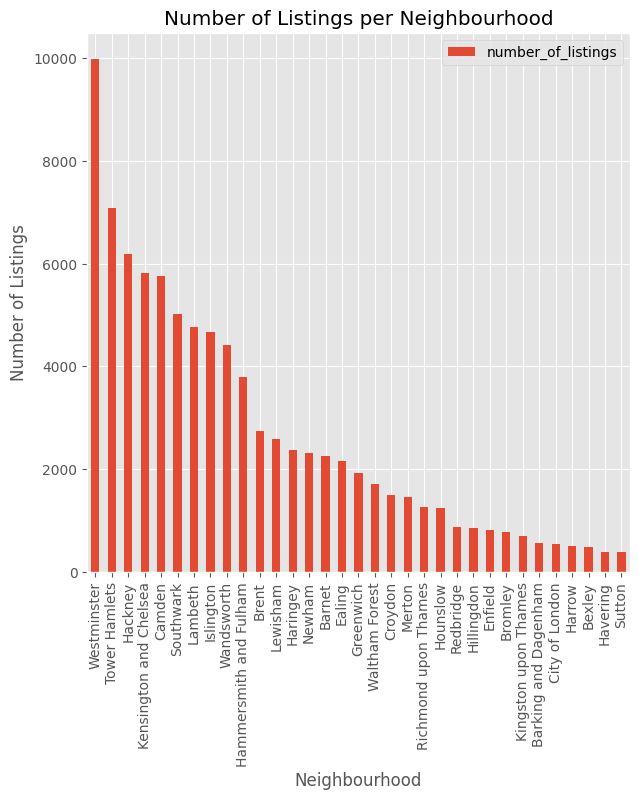

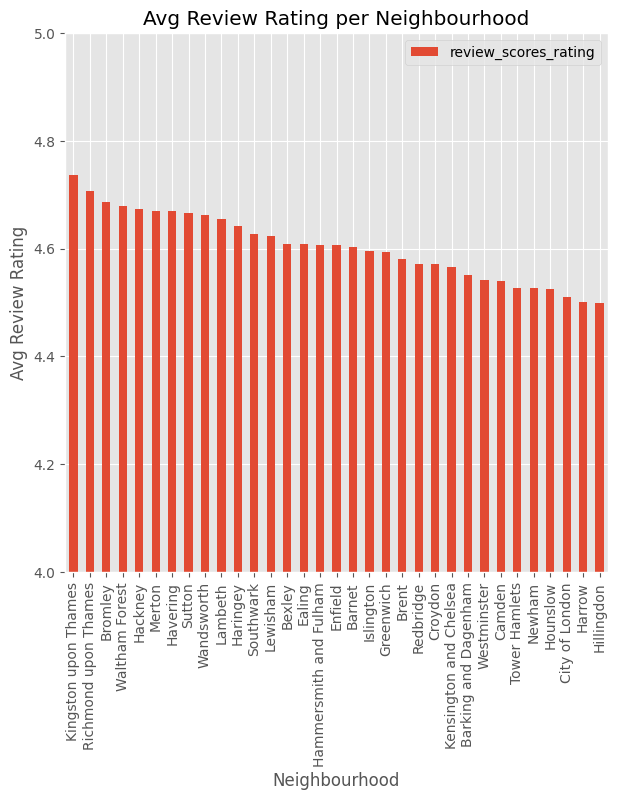

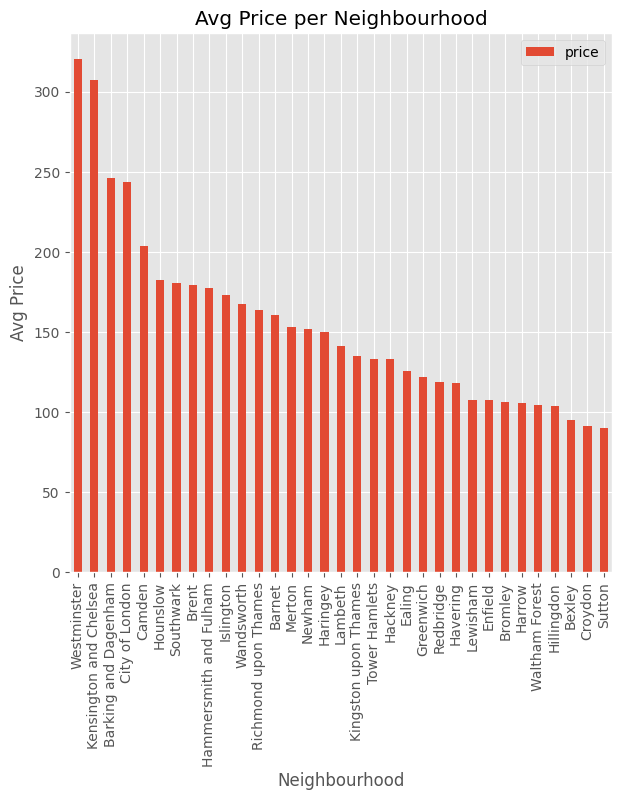

In [31]:
df_listings = pd.read_csv(input_path + 'listings.csv')

# 1. Calculate popular neighbourhoods based on number of listings
popular_neighbourhoods = df_listings.groupby('neighbourhood_cleansed')['id'].count().reset_index()
popular_neighbourhoods.rename(columns={'id': 'number_of_listings'}, inplace=True)

# 2. Calculate the average review scores by neighbourhood
avg_review_scores = df_listings.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().reset_index()

# 3. Calculate the average prices by neighbourhood
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)
avg_prices = df_listings.groupby('neighbourhood_cleansed')['price'].mean().reset_index()

# Bar plots
popular_neighbourhoods.set_index('neighbourhood_cleansed').sort_values('number_of_listings', ascending=False).plot(kind='bar', figsize=(7,7))
plt.title('Number of Listings per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.show()
print('\n\n')

avg_review_scores.set_index('neighbourhood_cleansed').sort_values('review_scores_rating', ascending=False).plot(kind='bar', figsize=(7,7), ylim=(4,5))
plt.title('Avg Review Rating per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Avg Review Rating')
plt.show()
print('\n\n')


avg_prices.set_index('neighbourhood_cleansed').sort_values('price', ascending=False).plot(kind='bar', figsize=(7,7))
plt.title('Avg Price per Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Avg Price')
plt.show()

<ipython-input-32-5e1a66221dfe>:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




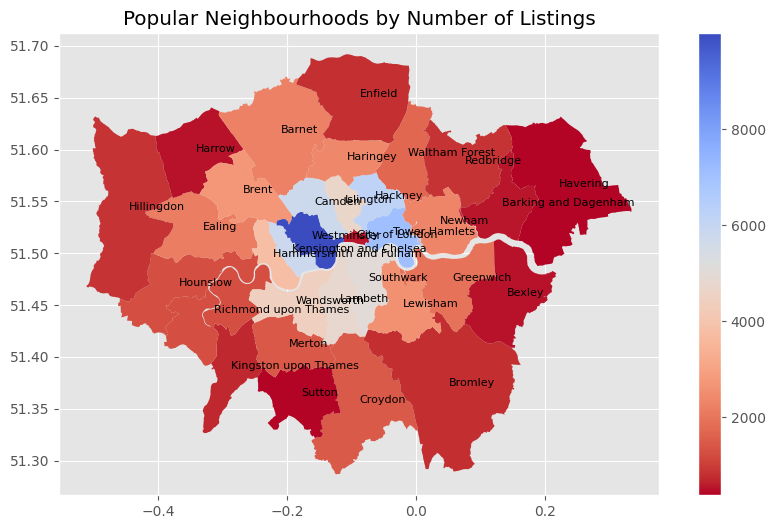

<ipython-input-32-5e1a66221dfe>:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




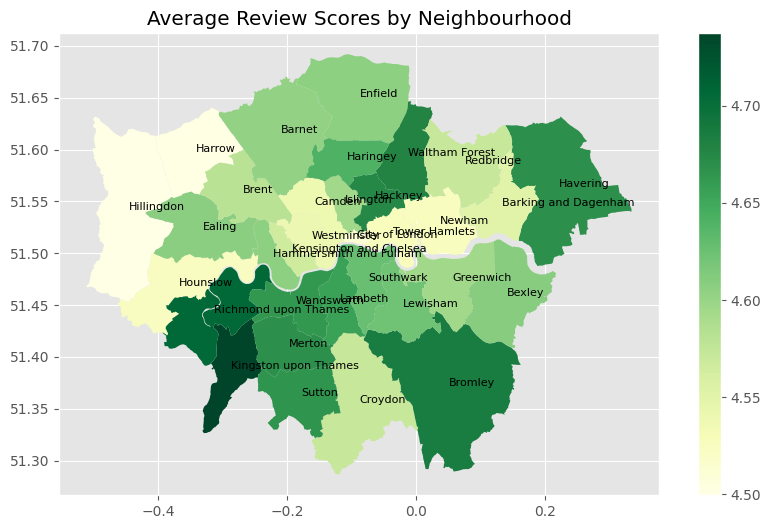

<ipython-input-32-5e1a66221dfe>:10: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




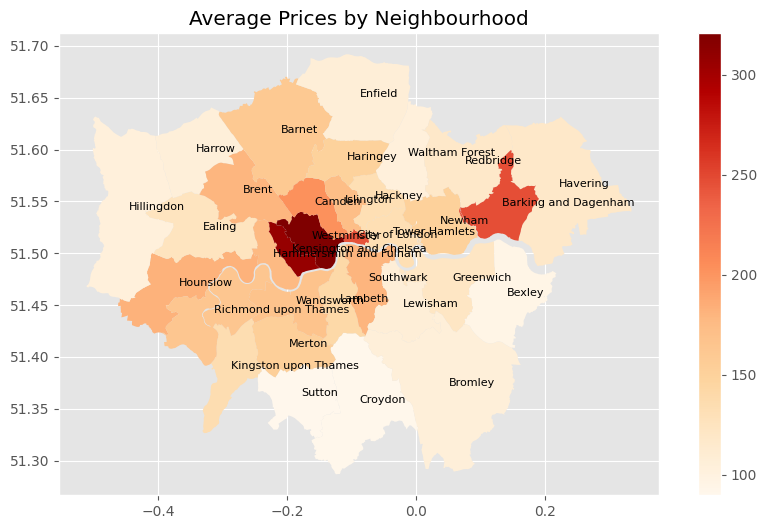

In [32]:
gdf = gpd.read_file(input_path + 'neighbourhoods.geojson')

# Merge the above data with the geodataframe
gdf = gdf.merge(popular_neighbourhoods, how='left', left_on='neighbourhood', right_on='neighbourhood_cleansed')
gdf = gdf.merge(avg_review_scores, how='left', left_on='neighbourhood', right_on='neighbourhood_cleansed')
gdf = gdf.merge(avg_prices, how='left', left_on='neighbourhood', right_on='neighbourhood_cleansed')

# Visualizing the data
def annotate_neighbourhoods(ax):
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighbourhood']):
        ax.text(x, y, label, fontsize=8)


# Popular neighbourhoods by number of listings
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='number_of_listings', cmap='coolwarm_r', legend=True, ax=ax)
ax.set_title("Popular Neighbourhoods by Number of Listings")
annotate_neighbourhoods(ax)
plt.show()

# Average review scores by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='review_scores_rating', cmap='YlGn', legend=True, ax=ax)
ax.set_title("Average Review Scores by Neighbourhood")
annotate_neighbourhoods(ax)
plt.show()

# Average prices by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='price', cmap='OrRd', legend=True, ax=ax)
ax.set_title("Average Prices by Neighbourhood")
annotate_neighbourhoods(ax)
plt.show()

# 8) Where the larger properties are located?

To determine the primary locations of more expansive Airbnb listings in London, we've made an assumption that properties with more than four bedrooms classify as 'larger'. Based on this criterion, it's evident that the central parts of London are predominant hubs for these bigger listings. This trend can be rationalized by the architectural history of the city. The central districts, many of which are older, traditionally feature more spacious houses, in contrast to the newer, more modern districts that might favor compact designs. This insight provides a snapshot into the structural evolution of London and the resultant distribution of listing sizes on platforms like Airbnb.

In [33]:
df_listings['bedrooms'].value_counts()

1.0     27161
2.0     18125
3.0      6339
4.0      2493
5.0       753
6.0       191
7.0        52
8.0        23
10.0        7
9.0         6
12.0        5
50.0        4
16.0        3
15.0        2
22.0        2
11.0        1
23.0        1
14.0        1
17.0        1
32.0        1
34.0        1
Name: bedrooms, dtype: int64

In [34]:
df_bigger = df_listings[df_listings['bedrooms'] >= 4.0]
df_bigger = df_bigger.groupby('neighbourhood_cleansed').agg(
                          count=('bedrooms','count')
                      )
df_bigger.sort_values('count', ascending=False)

count
neighbourhood_cleansed       
Westminster               297
Wandsworth                296
Kensington and Chelsea    216
Hammersmith and Fulham    196
Lambeth                   192
Southwark                 178
Camden                    167
Haringey                  162
Hackney                   160
Islington                 156
Barnet                    142
Brent                     135
Lewisham                  124
Richmond upon Thames      113
Ealing                    108
Merton                    106
Waltham Forest             91
Greenwich                  86
Tower Hamlets              84
Croydon                    68
Newham                     65
Hounslow                   54
Kingston upon Thames       51
Redbridge                  51
Bromley                    47
Enfield                    38
Havering                   36
Hillingdon                 33
Bexley                     27
Barking and Dagenham       27
Harrow                     25
Sutton                     12
City of London              4

<ipython-input-35-5934f3b87ca4>:9: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




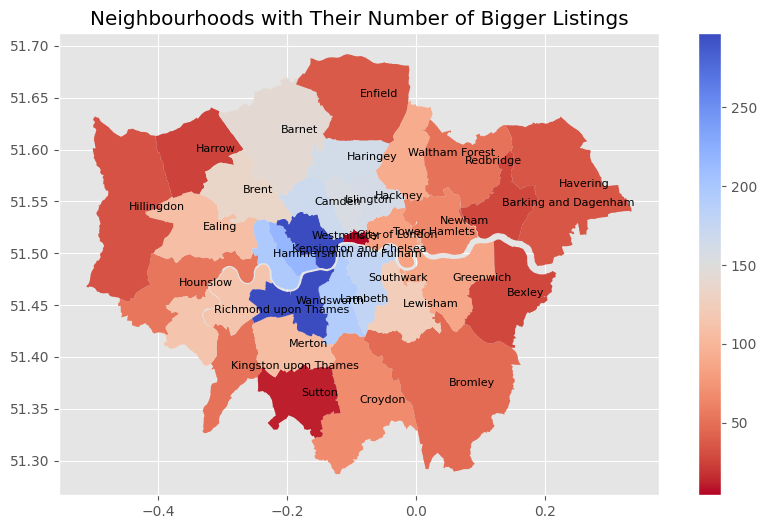

In [35]:
gdf = gpd.read_file(input_path + 'neighbourhoods.geojson')

# Merge the above data with the geodataframe
gdf = gdf.merge(df_bigger, how='left', left_on='neighbourhood', right_index=True)


# Visualizing the data
def annotate_neighbourhoods(ax):
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighbourhood']):
        ax.text(x, y, label, fontsize=8)


# Popular neighbourhoods by number of listings
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='count', cmap='coolwarm_r', legend=True, ax=ax)
ax.set_title("Neighbourhoods with Their Number of Bigger Listings")
annotate_neighbourhoods(ax)
plt.show()

# 9) How is the occupancy rate between neighbourhoods?

A close examination of occupancy rates across different neighbourhoods of London paints a distinct picture. Central districts, with their prime location and proximity to many attractions, demonstrate a significantly higher occupancy rate. This aligns with the expectation that areas closer to major tourist attractions and business hubs would naturally see more frequent bookings. In stark contrast, the eastern parts of London exhibit the lowest occupancy rates, often dipping below the 50% mark. The reasons for this variance might be multifaceted, encompassing factors like accessibility, local amenities, or perceptions of the area. It emphasizes the importance for hosts in these regions to potentially re-evaluate their offerings or marketing strategies to boost occupancy.

<ipython-input-36-8ff968cfb7b2>:11: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




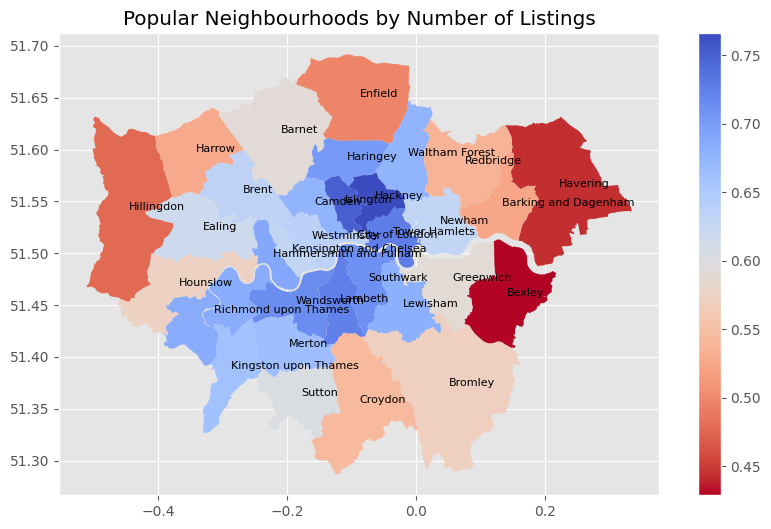

In [36]:
# 3. Calculate the average prices by neighbourhood
gdf = gpd.read_file(input_path + 'neighbourhoods.geojson')
df_listings['occupancy_rate'] = 1 - df_listings['availability_365'] / 365
occupancy_rate = df_listings.groupby('neighbourhood_cleansed')['occupancy_rate'].mean().reset_index()

# Merge the above data with the geodataframe
gdf = gdf.merge(occupancy_rate, how='left', left_on='neighbourhood', right_on='neighbourhood_cleansed')

# Visualizing the data
def annotate_neighbourhoods(ax):
    for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['neighbourhood']):
        ax.text(x, y, label, fontsize=8)


# Popular neighbourhoods by number of listings
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='occupancy_rate', cmap='coolwarm_r', legend=True, ax=ax)
ax.set_title("Popular Neighbourhoods by Number of Listings")
annotate_neighbourhoods(ax)
plt.show()


# 10) SuperHost Difference

Superhosts on Airbnb consistently outperform regular hosts in terms of review scores, highlighting their commitment to superior guest experiences. They also tend to be more responsive. Interestingly, they manage fewer listings compared to regular hosts, suggesting a focus on quality over quantity. This emphasis likely contributes to their consistently high ratings and positive guest feedback.

<ipython-input-37-517fa70458b9>:1: DtypeWarning:

Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.



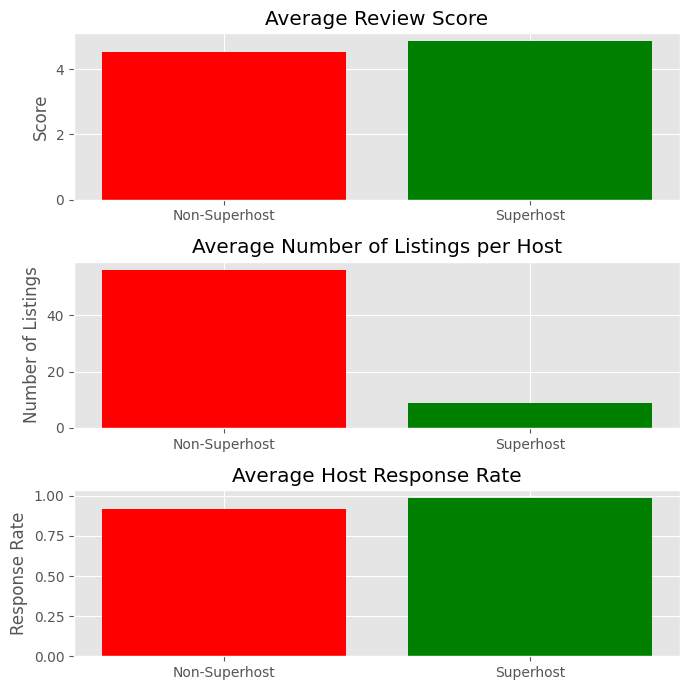

In [37]:
df_listings = pd.read_csv(input_path + 'listings.csv')

# Convert columns with percentage to numeric for ease of use
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0

# Group by superhost status and calculate mean for select columns
avg_metrics = df_listings.groupby('host_is_superhost').agg({
    'review_scores_rating': 'mean',
    'host_listings_count': 'mean',
    'host_response_rate': 'mean'
}).reset_index()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(7, 7))

# Average review score
axs[0].bar(avg_metrics['host_is_superhost'], avg_metrics['review_scores_rating'], color=['red', 'green'])
axs[0].set_title('Average Review Score')
axs[0].set_ylabel('Score')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Non-Superhost', 'Superhost'])

# Number of listings per host
axs[1].bar(avg_metrics['host_is_superhost'], avg_metrics['host_listings_count'], color=['red', 'green'])
axs[1].set_title('Average Number of Listings per Host')
axs[1].set_ylabel('Number of Listings')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Non-Superhost', 'Superhost'])

# Host response rate
axs[2].bar(avg_metrics['host_is_superhost'], avg_metrics['host_response_rate'], color=['red', 'green'])
axs[2].set_title('Average Host Response Rate')
axs[2].set_ylabel('Response Rate')
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Non-Superhost', 'Superhost'])

plt.tight_layout()
plt.show()
